In [ ]:
# default_exp gbe.wm.reliability

# Working memory task - Reliability

<div>
    <p align="left"><img src="images/wm_task.png" width = '200px'> 

    
   
    
</div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.wm.data_provider import WMDataProvider
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)

9 participants used an old version of the task in some of their sessions.  14 sessions (2.58%) were removed from the dataset.
6 sessions (1.14%) were removed because participants failed a level two trial.


## Test-retest reliability

### Gold Standard: Maximum WM load

#### No distractor 1

R[write to console]: Loading required package: psych

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.325,1.961,239.0,240.0,0.0,0.226,0.416,".32 (.23, .42)"
Single_random_raters,ICC2,0.325,1.961,239.0,239.0,0.0,0.226,0.416,".32 (.23, .42)"
Single_fixed_raters,ICC3,0.325,1.961,239.0,239.0,0.0,0.226,0.416,".32 (.23, .42)"
Average_raters_absolute,ICC1k,0.490,1.961,239.0,240.0,0.0,0.369,0.588,".49 (.37, .59)"
Average_random_raters,ICC2k,0.490,1.961,239.0,239.0,0.0,0.369,0.588,".49 (.37, .59)"
Average_fixed_raters,ICC3k,0.490,1.961,239.0,239.0,0.0,0.369,0.588,".49 (.37, .59)"


,variance,Percent
ID,0.356,0.325
Items,0.000,0.000
Residual,0.740,0.675
Total,1.095,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


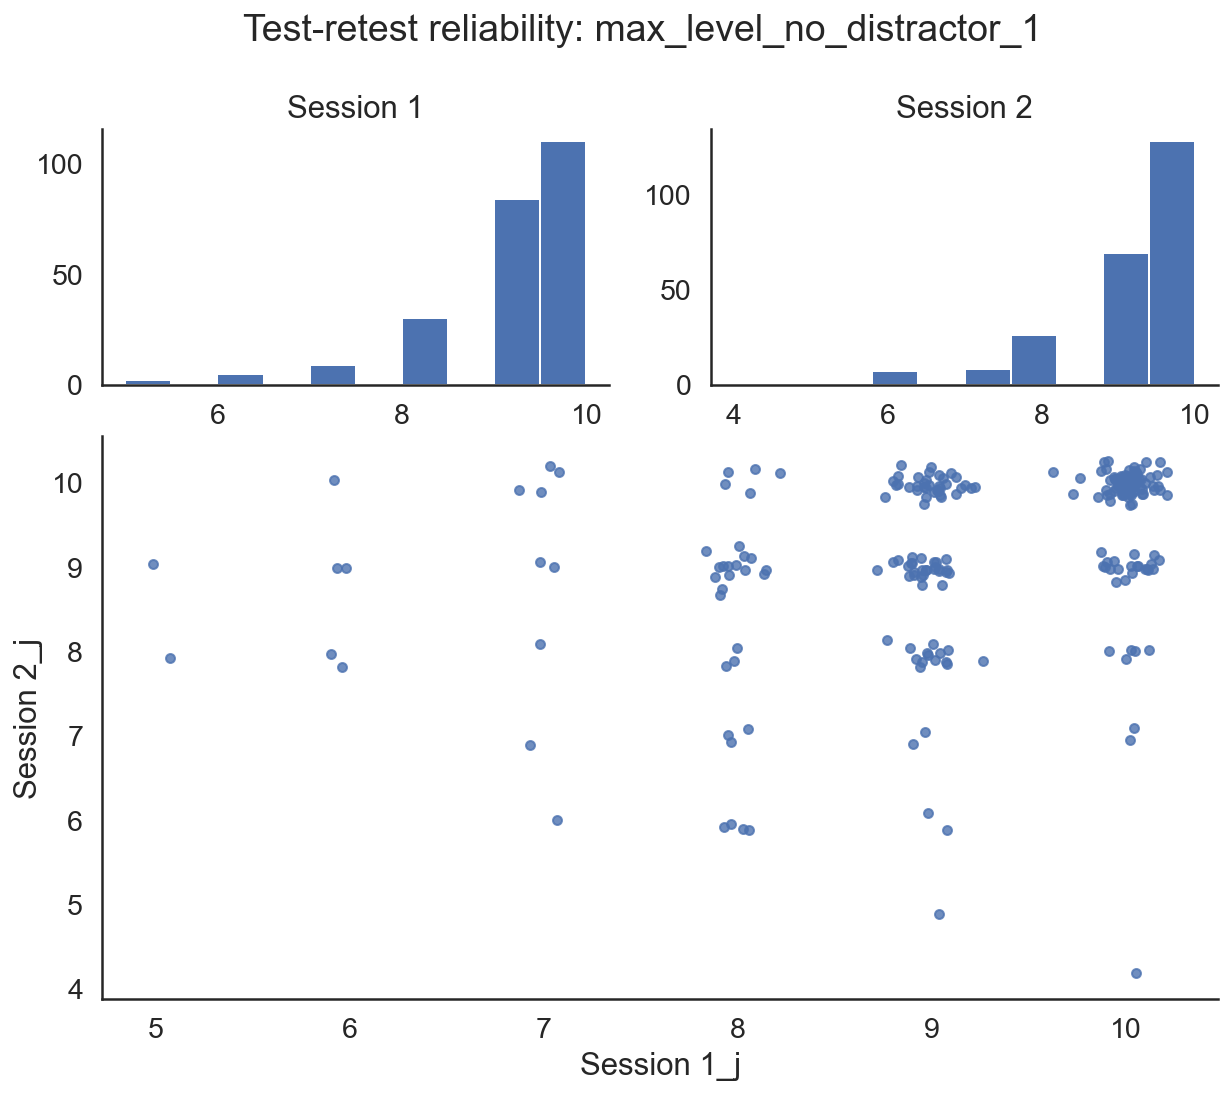

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_1', add_jitter = True)

#### No distractor 2

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.450,2.639,239.0,240.0,0.0,0.362,0.531,".45 (.36, .53)"
Single_random_raters,ICC2,0.450,2.639,239.0,239.0,0.0,0.362,0.531,".45 (.36, .53)"
Single_fixed_raters,ICC3,0.450,2.639,239.0,239.0,0.0,0.361,0.531,".45 (.36, .53)"
Average_raters_absolute,ICC1k,0.621,2.639,239.0,240.0,0.0,0.531,0.694,".62 (.53, .69)"
Average_random_raters,ICC2k,0.621,2.639,239.0,239.0,0.0,0.531,0.694,".62 (.53, .69)"
Average_fixed_raters,ICC3k,0.621,2.639,239.0,239.0,0.0,0.531,0.694,".62 (.53, .69)"


,variance,Percent
ID,0.568,0.45
Items,0.000,0.00
Residual,0.694,0.55
Total,1.262,1.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


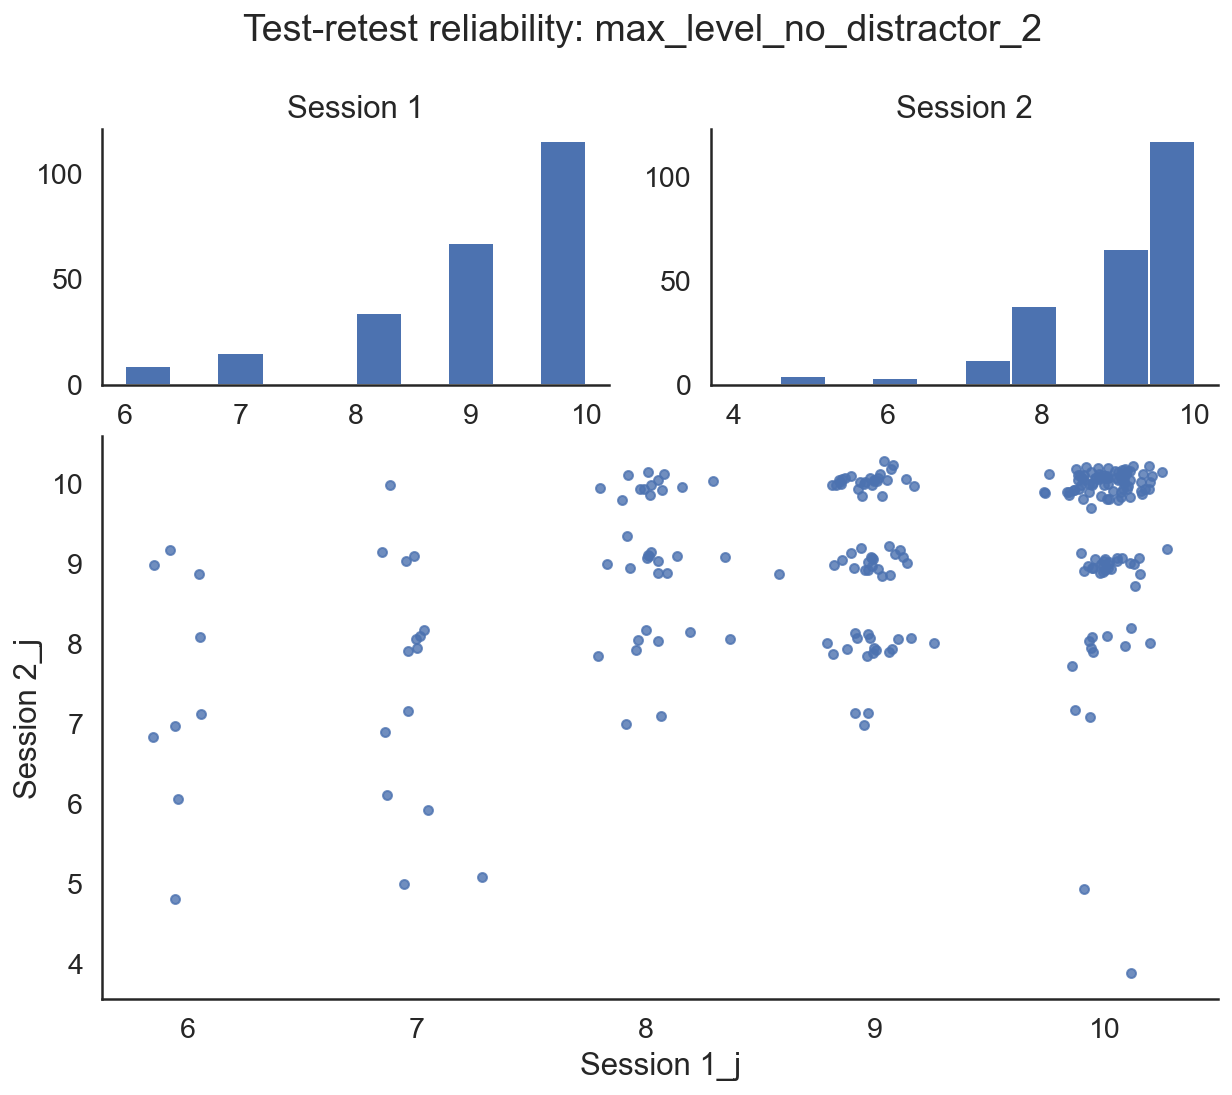

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.368,2.164,239.0,240.0,0.0,0.272,0.456,".37 (.27, .46)"
Single_random_raters,ICC2,0.371,2.203,239.0,239.0,0.0,0.277,0.459,".37 (.28, .46)"
Single_fixed_raters,ICC3,0.376,2.203,239.0,239.0,0.0,0.281,0.463,".38 (.28, .46)"
Average_raters_absolute,ICC1k,0.538,2.164,239.0,240.0,0.0,0.428,0.627,".54 (.43, .63)"
Average_random_raters,ICC2k,0.542,2.203,239.0,239.0,0.0,0.433,0.629,".54 (.43, .63)"
Average_fixed_raters,ICC3k,0.546,2.203,239.0,239.0,0.0,0.438,0.633,".55 (.44, .63)"


,variance,Percent
ID,0.521,0.371
Items,0.016,0.011
Residual,0.866,0.618
Total,1.402,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


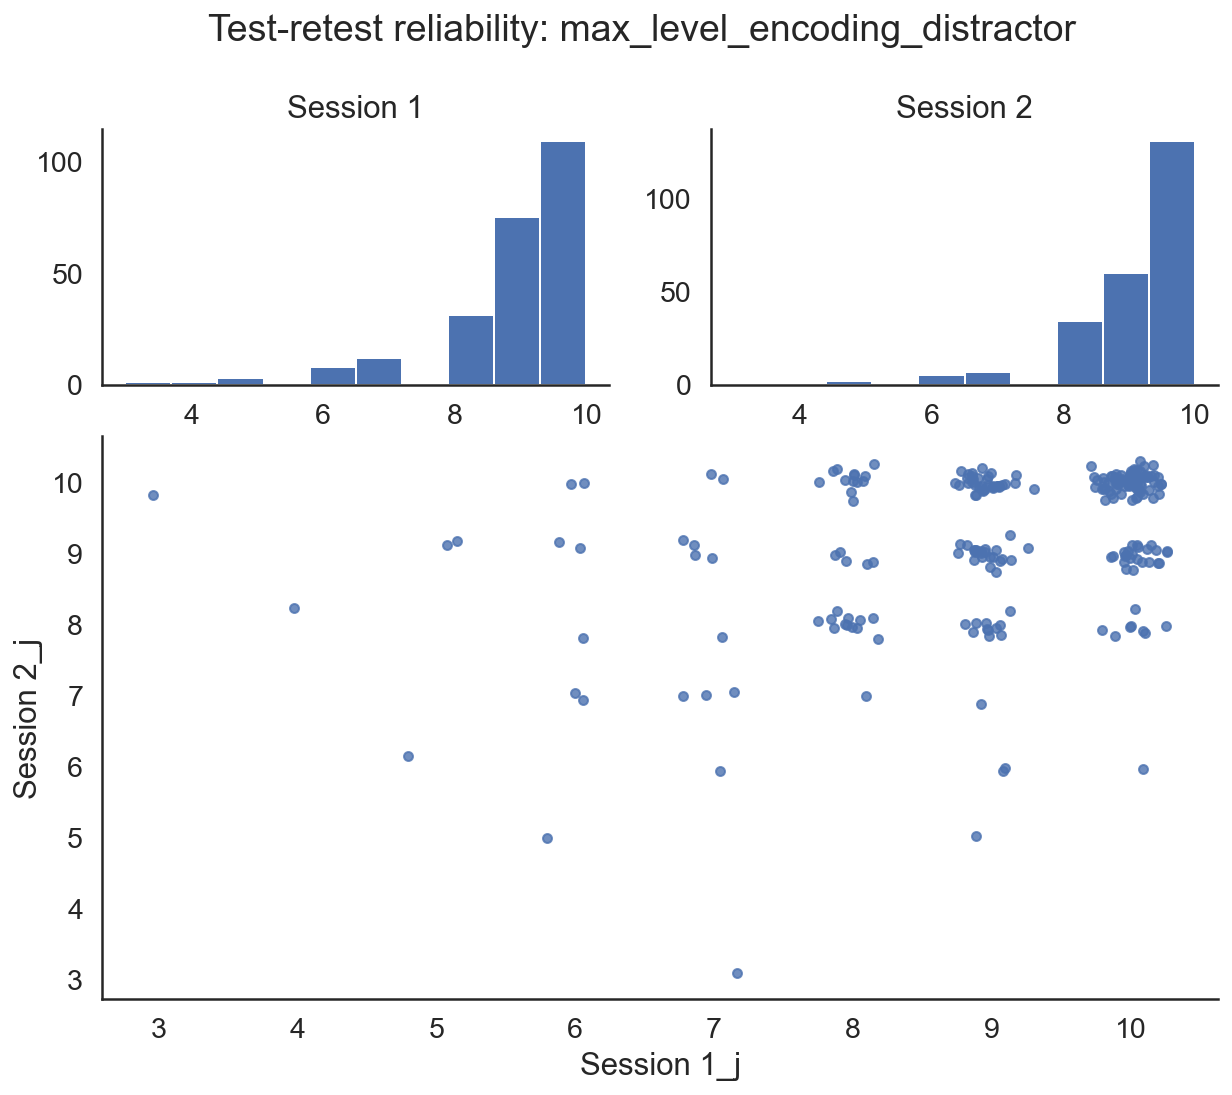

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_encoding_distractor = stats.analyze_reliability(_df, dependent = 'max_level_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.384,2.247,239.0,240.0,0.0,0.290,0.471,".38 (.29, .47)"
Single_random_raters,ICC2,0.390,2.323,239.0,239.0,0.0,0.296,0.477,".39 (.30, .48)"
Single_fixed_raters,ICC3,0.398,2.323,239.0,239.0,0.0,0.305,0.484,".40 (.30, .48)"
Average_raters_absolute,ICC1k,0.555,2.247,239.0,240.0,0.0,0.449,0.640,".55 (.45, .64)"
Average_random_raters,ICC2k,0.561,2.323,239.0,239.0,0.0,0.457,0.646,".56 (.46, .65)"
Average_fixed_raters,ICC3k,0.569,2.323,239.0,239.0,0.0,0.467,0.652,".57 (.47, .65)"


,variance,Percent
ID,0.741,0.39
Items,0.038,0.02
Residual,1.120,0.59
Total,1.899,1.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


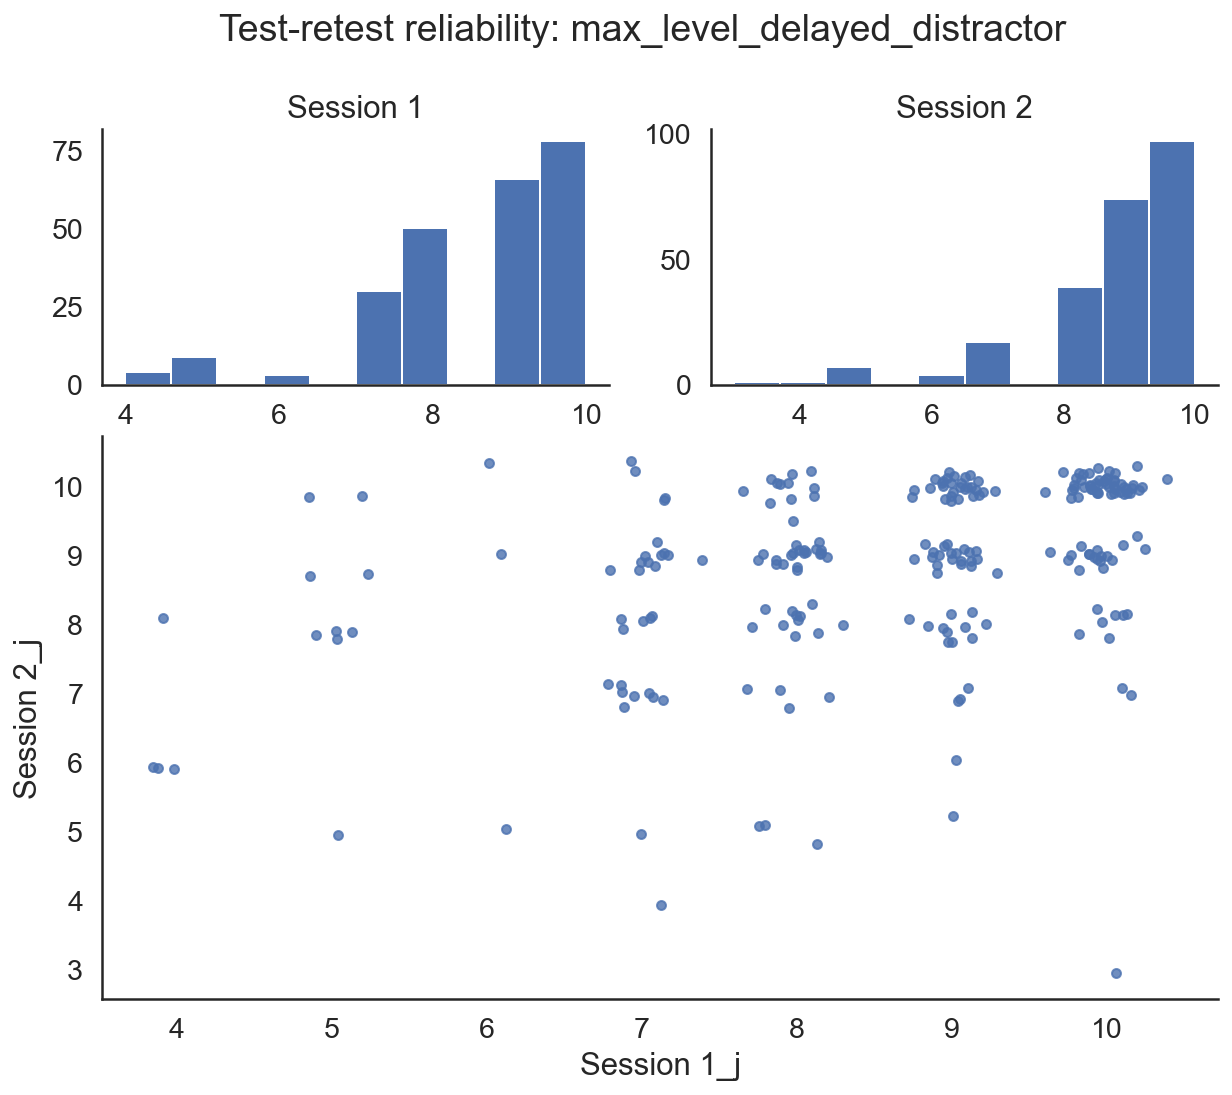

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_delayed_distractor = stats.analyze_reliability(_df, dependent = 'max_level_delayed_distractor', add_jitter = True)

### Trial-level analyses: Trial types and sessions modelled separately (check)

#### No distractor 1

In [ ]:
_df = wm_scoring.get_perc_correct_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.351,2.083,239.0,240.0,0.0,0.255,0.441,".35 (.25, .44)"
Single_random_raters,ICC2,0.352,2.094,239.0,239.0,0.0,0.256,0.442,".35 (.26, .44)"
Single_fixed_raters,ICC3,0.354,2.094,239.0,239.0,0.0,0.257,0.443,".35 (.26, .44)"
Average_raters_absolute,ICC1k,0.520,2.083,239.0,240.0,0.0,0.406,0.612,".52 (.41, .61)"
Average_random_raters,ICC2k,0.521,2.094,239.0,239.0,0.0,0.408,0.613,".52 (.41, .61)"
Average_fixed_raters,ICC3k,0.523,2.094,239.0,239.0,0.0,0.409,0.614,".52 (.41, .61)"


,variance,Percent
ID,0.005,0.352
Items,0.000,0.003
Residual,0.010,0.644
Total,0.016,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


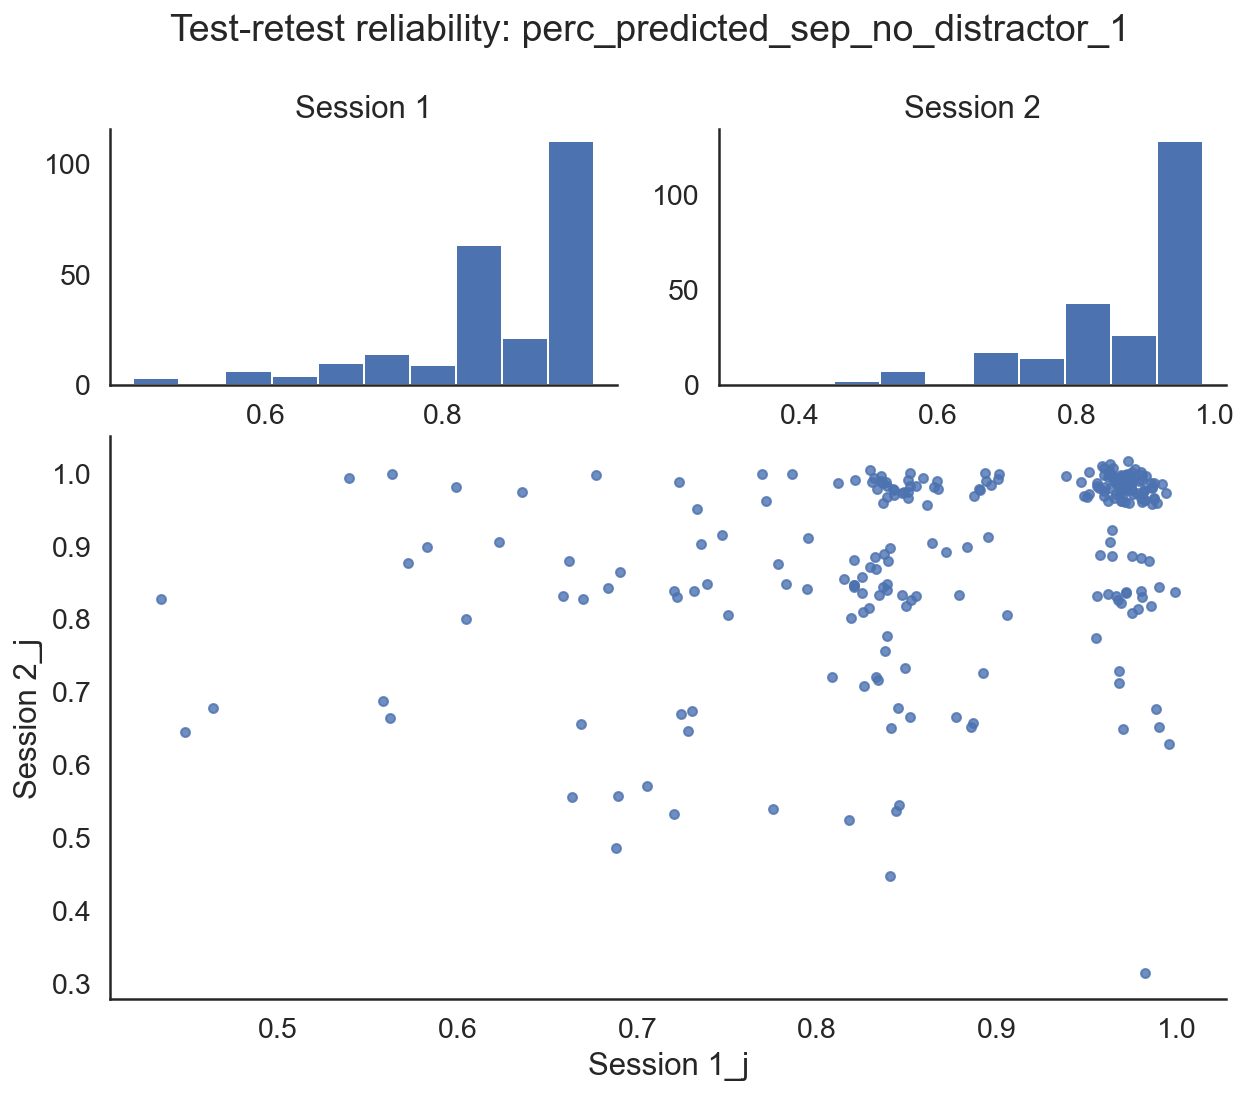

In [ ]:
iccs_perc_predicted_sep_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_1', add_jitter = True)

#### No distractor 2

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.454,2.661,239.0,240.0,0.0,0.365,0.534,".45 (.37, .53)"
Single_random_raters,ICC2,0.454,2.661,239.0,239.0,0.0,0.365,0.534,".45 (.37, .53)"
Single_fixed_raters,ICC3,0.454,2.661,239.0,239.0,0.0,0.365,0.534,".45 (.37, .53)"
Average_raters_absolute,ICC1k,0.624,2.661,239.0,240.0,0.0,0.535,0.696,".62 (.54, .70)"
Average_random_raters,ICC2k,0.624,2.661,239.0,239.0,0.0,0.535,0.696,".62 (.54, .70)"
Average_fixed_raters,ICC3k,0.624,2.661,239.0,239.0,0.0,0.535,0.696,".62 (.53, .70)"


,variance,Percent
ID,0.009,0.454
Items,0.000,0.000
Residual,0.010,0.546
Total,0.019,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


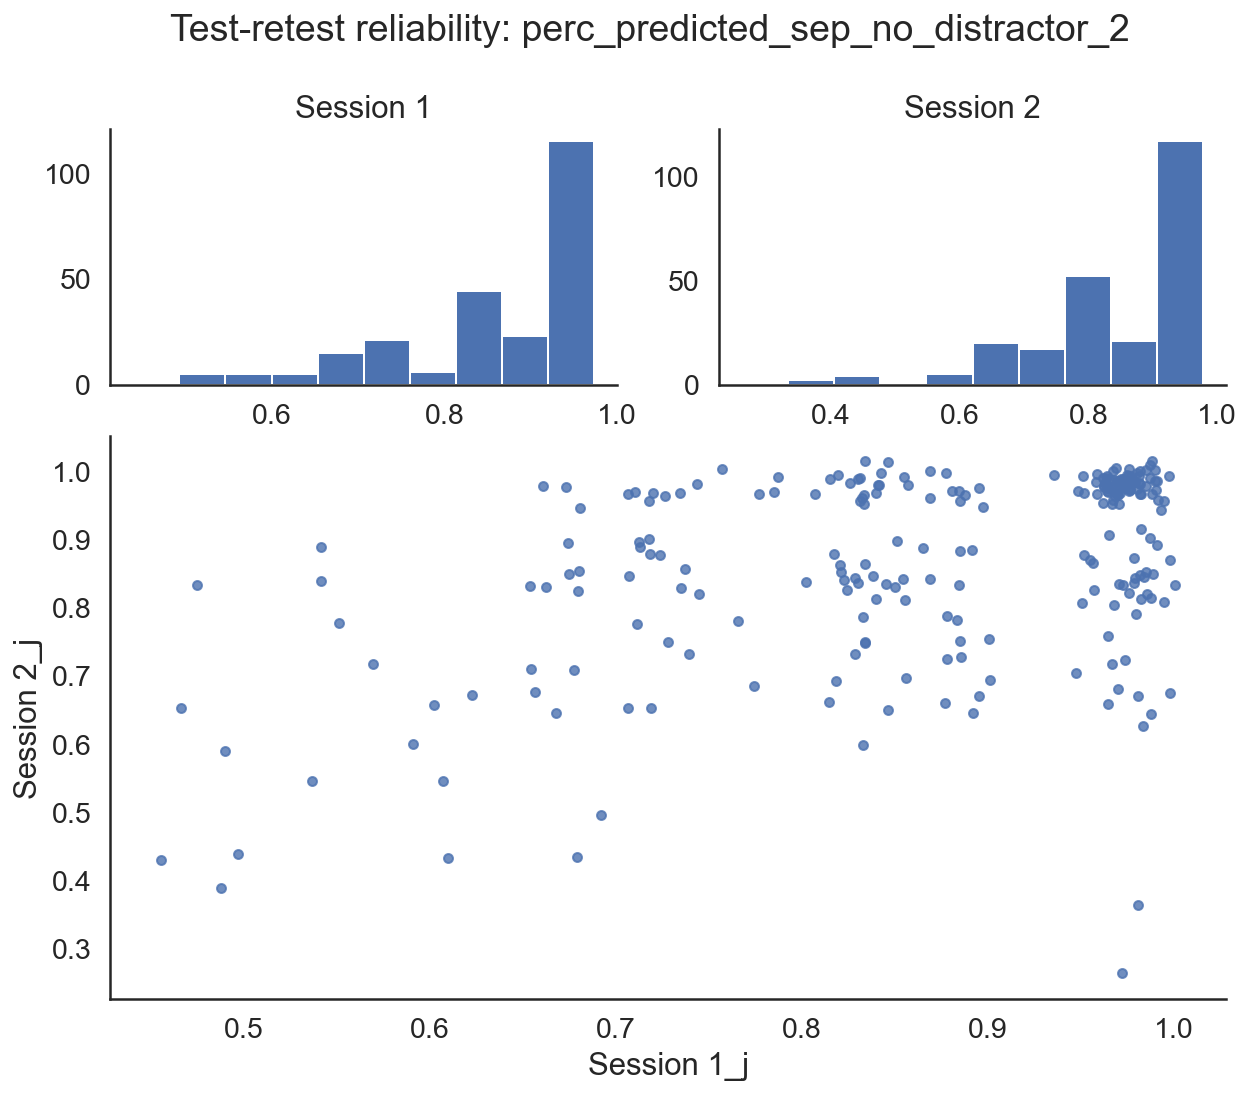

In [ ]:
iccs_perc_predicted_sep_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.354,2.096,239.0,240.0,0.0,0.258,0.444,".35 (.26, .44)"
Single_random_raters,ICC2,0.359,2.148,239.0,239.0,0.0,0.263,0.448,".36 (.26, .45)"
Single_fixed_raters,ICC3,0.365,2.148,239.0,239.0,0.0,0.269,0.453,".36 (.27, .45)"
Average_raters_absolute,ICC1k,0.523,2.096,239.0,240.0,0.0,0.410,0.615,".52 (.41, .61)"
Average_random_raters,ICC2k,0.528,2.148,239.0,239.0,0.0,0.417,0.619,".53 (.42, .62)"
Average_fixed_raters,ICC3k,0.534,2.148,239.0,239.0,0.0,0.424,0.624,".53 (.42, .62)"


,variance,Percent
ID,0.007,0.359
Items,0.000,0.015
Residual,0.013,0.626
Total,0.021,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


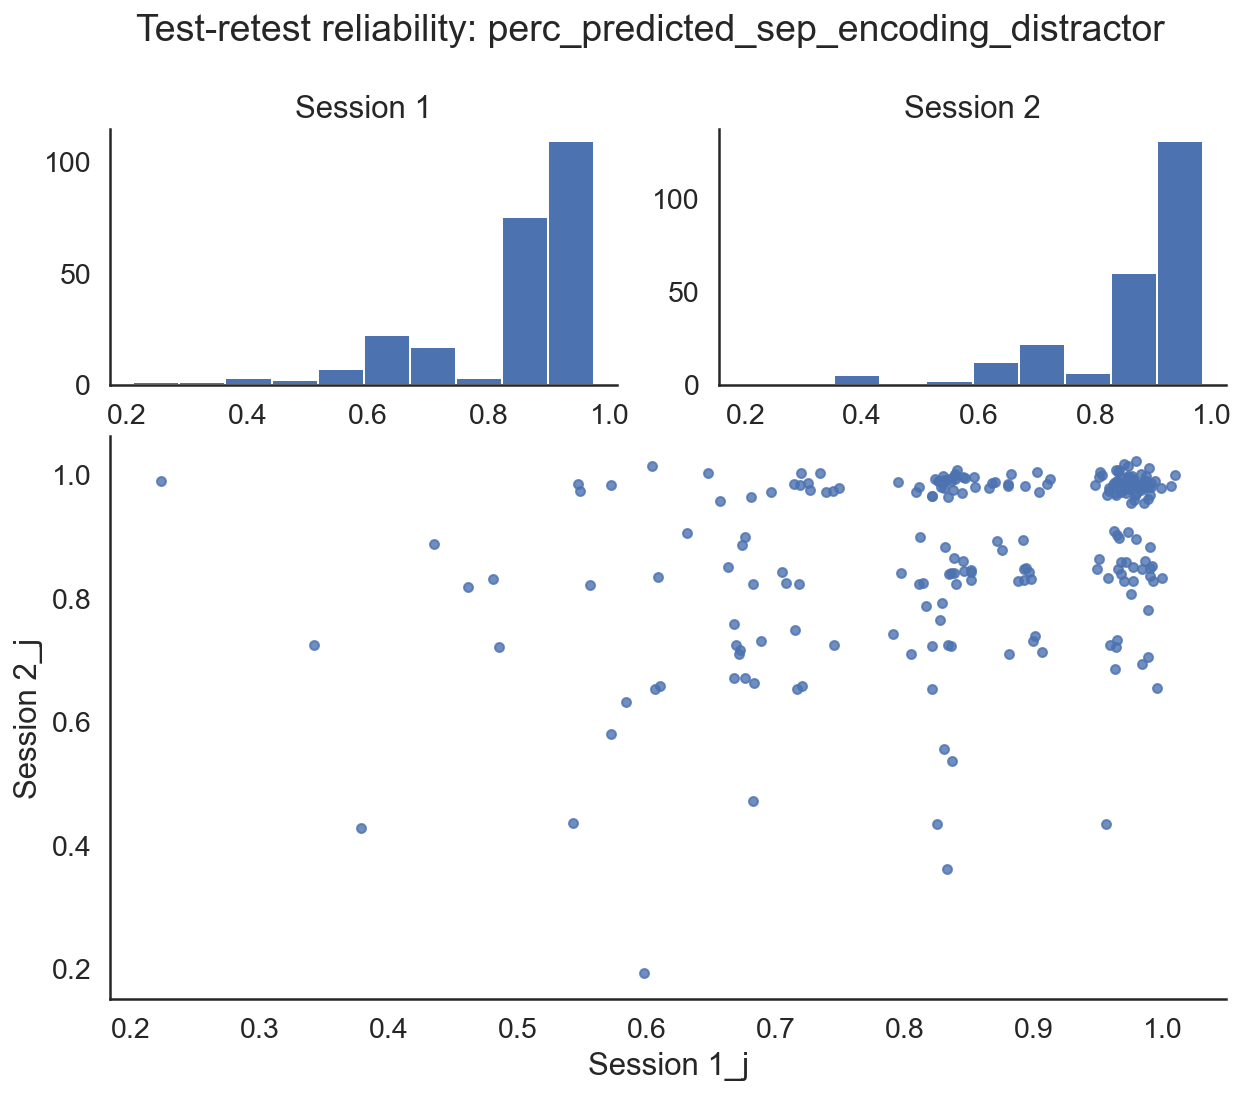

In [ ]:
perc_predicted_sep_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.413,2.406,239.0,240.0,0.0,0.321,0.497,".41 (.32, .50)"
Single_random_raters,ICC2,0.422,2.551,239.0,239.0,0.0,0.327,0.509,".42 (.33, .51)"
Single_fixed_raters,ICC3,0.437,2.551,239.0,239.0,0.0,0.347,0.519,".44 (.35, .52)"
Average_raters_absolute,ICC1k,0.584,2.406,239.0,240.0,0.0,0.486,0.664,".58 (.49, .66)"
Average_random_raters,ICC2k,0.594,2.551,239.0,239.0,0.0,0.493,0.674,".59 (.49, .67)"
Average_fixed_raters,ICC3k,0.608,2.551,239.0,239.0,0.0,0.515,0.683,".61 (.51, .68)"


,variance,Percent
ID,0.011,0.422
Items,0.001,0.033
Residual,0.014,0.545
Total,0.026,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


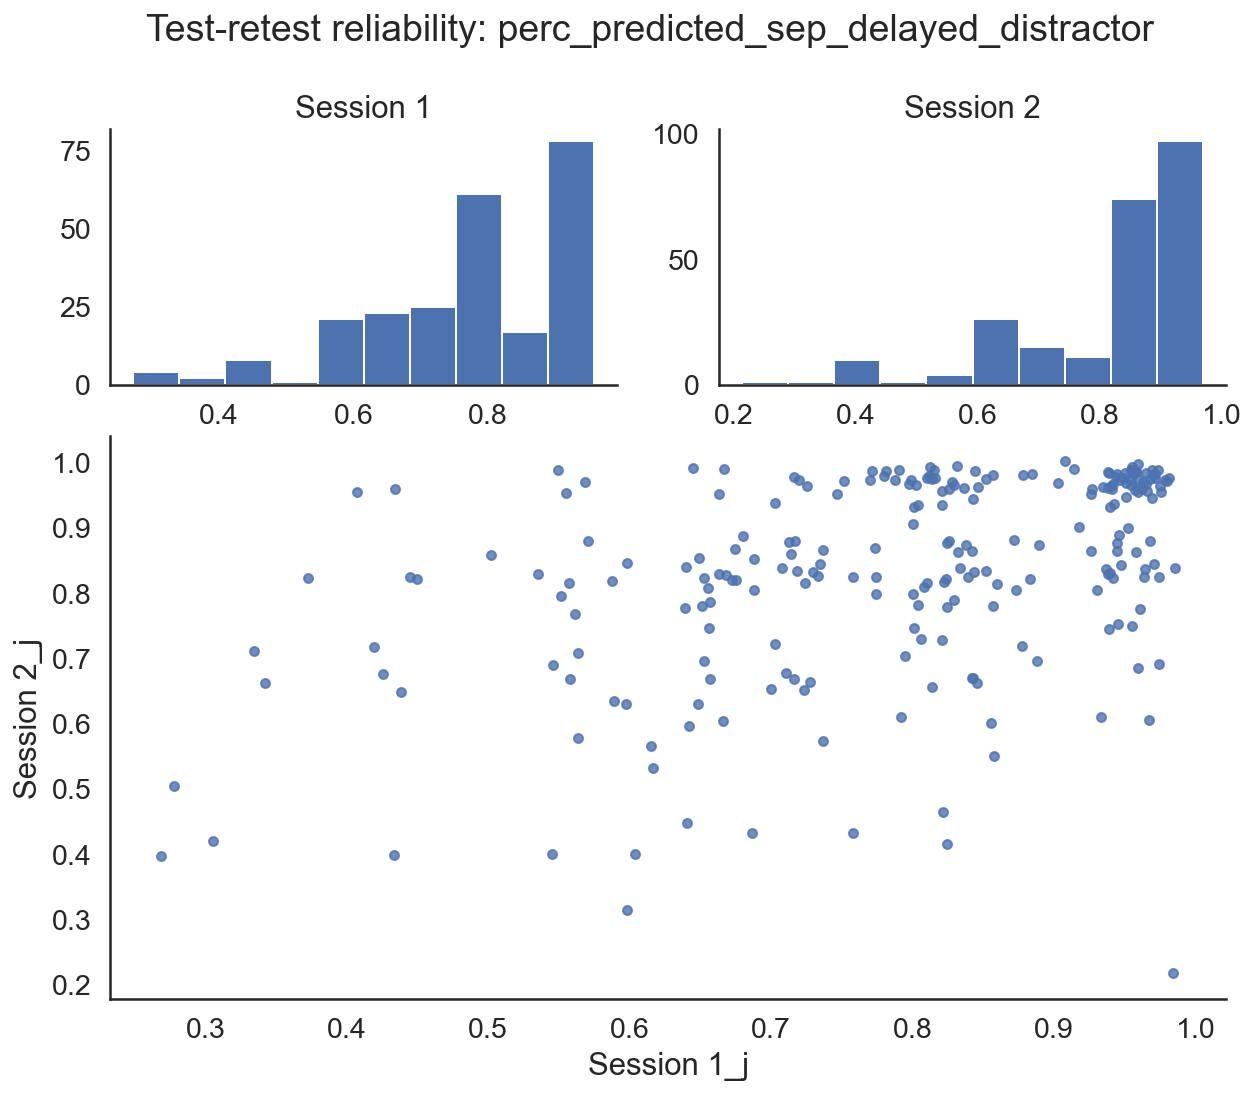

In [ ]:
perc_predicted_sep_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_delayed_distractor', add_jitter = True)

### Trial types modeled separately but sessions modelled combined

#### No distractor 1

In [ ]:
_df, ms = wm_scoring.get_perc_correct_predicted_sep_trial(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.55,3.443,239.0,240.0,0.0,0.471,0.620,".55 (.47, .62)"
Single_random_raters,ICC2,0.55,3.443,239.0,239.0,0.0,0.471,0.620,".55 (.47, .62)"
Single_fixed_raters,ICC3,0.55,3.443,239.0,239.0,0.0,0.471,0.620,".55 (.47, .62)"
Average_raters_absolute,ICC1k,0.71,3.443,239.0,240.0,0.0,0.641,0.765,".71 (.64, .77)"
Average_random_raters,ICC2k,0.71,3.443,239.0,239.0,0.0,0.641,0.765,".71 (.64, .77)"
Average_fixed_raters,ICC3k,0.71,3.443,239.0,239.0,0.0,0.641,0.765,".71 (.64, .77)"


,variance,Percent
ID,0.009,0.55
Items,0.000,0.00
Residual,0.007,0.45
Total,0.016,1.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


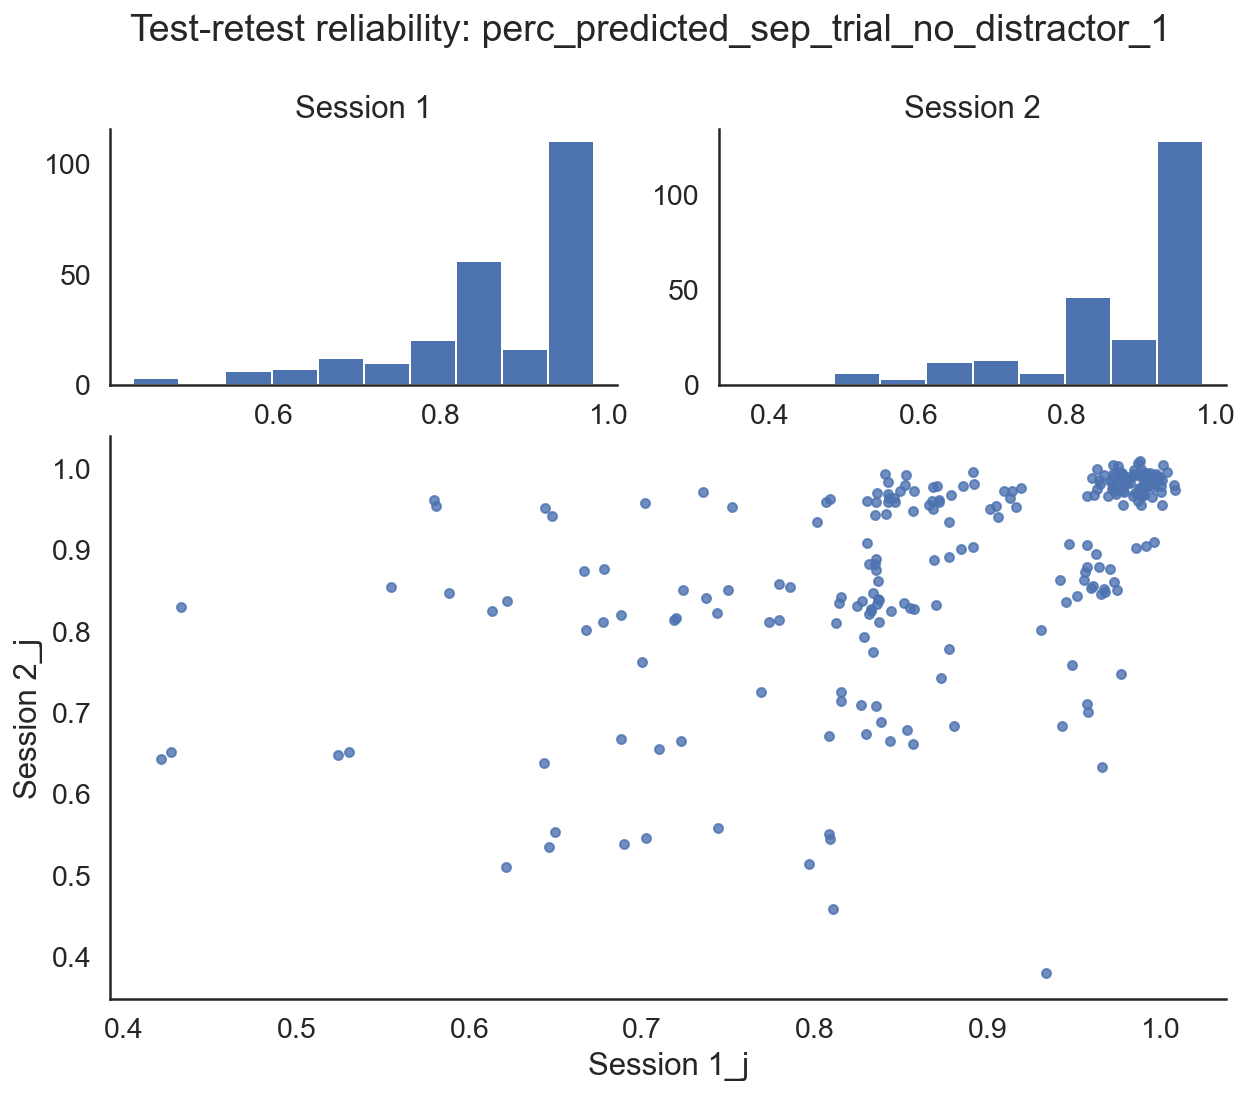

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_1', add_jitter = True)

In [ ]:
def get_model_calculated_icc(m):
    %R require(insight) -i m
    %R var_sess <- get_variance_intercept(m)[1]
    %R var_pp <- get_variance_intercept(m)[2]
    %R icc <- var_pp / (var_pp+(var_sess)) -o icc -o var_sess -o var_pp
    # Note that what get_variance_intercept outputs as session variance, we call residual, here
    variances = pd.DataFrame({"type":["Participant","Session","Residual"],"variance":[var_pp[0],0,var_sess[0]]})
    variances["Percent"] = variances.variance/variances.variance.sum()
    variances = {'iccs':[None, variances]}
    return {'icc':icc[0],'variances':variances}

iccs_perc_predicted_sep_trial_mod_no_distractor_1 = get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

R[write to console]: Loading required package: insight



0.6146190361165279

#### No distractor 2

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.628,4.373,239.0,240.0,0.0,0.559,0.688,".63 (.56, .69)"
Single_random_raters,ICC2,0.628,4.373,239.0,239.0,0.0,0.559,0.688,".63 (.56, .69)"
Single_fixed_raters,ICC3,0.628,4.373,239.0,239.0,0.0,0.559,0.688,".63 (.56, .69)"
Average_raters_absolute,ICC1k,0.771,4.373,239.0,240.0,0.0,0.717,0.815,".77 (.72, .82)"
Average_random_raters,ICC2k,0.771,4.373,239.0,239.0,0.0,0.717,0.815,".77 (.72, .82)"
Average_fixed_raters,ICC3k,0.771,4.373,239.0,239.0,0.0,0.717,0.815,".77 (.72, .82)"


,variance,Percent
ID,0.012,0.628
Items,0.000,0.000
Residual,0.007,0.372
Total,0.019,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


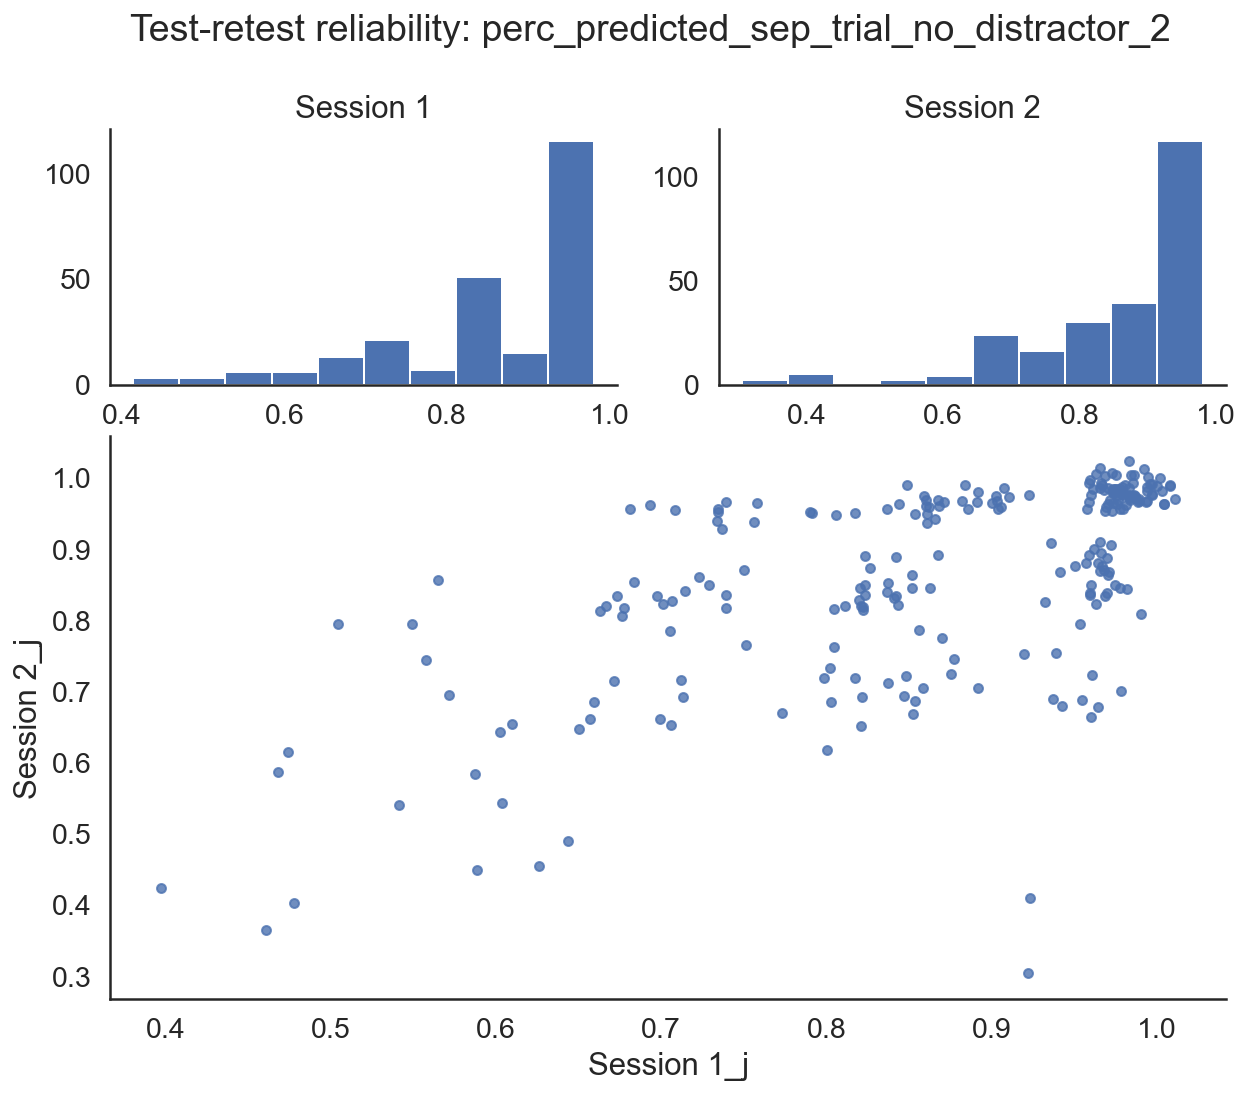

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_2', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.6103074907241068

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.480,2.847,239.0,240.0,0.0,0.394,0.558,".48 (.39, .56)"
Single_random_raters,ICC2,0.482,2.888,239.0,239.0,0.0,0.396,0.559,".48 (.40, .56)"
Single_fixed_raters,ICC3,0.486,2.888,239.0,239.0,0.0,0.400,0.563,".49 (.40, .56)"
Average_raters_absolute,ICC1k,0.649,2.847,239.0,240.0,0.0,0.565,0.716,".65 (.57, .72)"
Average_random_raters,ICC2k,0.650,2.888,239.0,239.0,0.0,0.568,0.717,".65 (.57, .72)"
Average_fixed_raters,ICC3k,0.654,2.888,239.0,239.0,0.0,0.571,0.720,".65 (.57, .72)"


,variance,Percent
ID,0.010,0.482
Items,0.000,0.007
Residual,0.010,0.511
Total,0.021,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


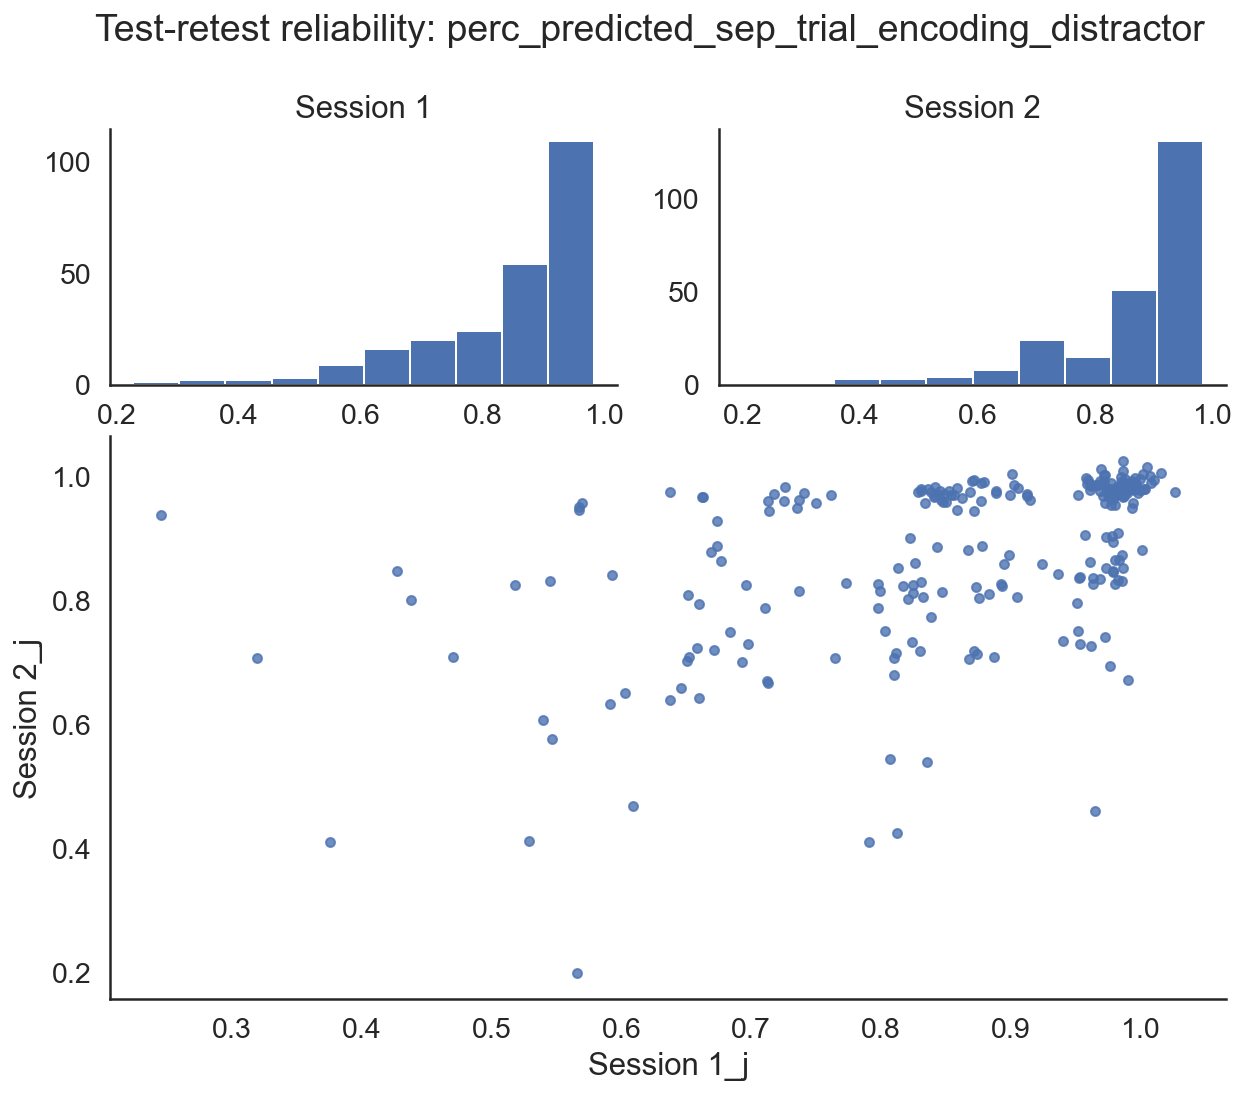

In [ ]:
perc_predicted_sep_trial_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_encoding_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.4853121351104168

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.600,4.003,239.0,240.0,0.0,0.528,0.664,".60 (.53, .66)"
Single_random_raters,ICC2,0.603,4.153,239.0,239.0,0.0,0.528,0.668,".60 (.53, .67)"
Single_fixed_raters,ICC3,0.612,4.153,239.0,239.0,0.0,0.541,0.674,".61 (.54, .67)"
Average_raters_absolute,ICC1k,0.750,4.003,239.0,240.0,0.0,0.691,0.798,".75 (.69, .80)"
Average_random_raters,ICC2k,0.752,4.153,239.0,239.0,0.0,0.691,0.801,".75 (.69, .80)"
Average_fixed_raters,ICC3k,0.759,4.153,239.0,239.0,0.0,0.702,0.805,".76 (.70, .81)"


,variance,Percent
ID,0.016,0.603
Items,0.000,0.014
Residual,0.010,0.383
Total,0.026,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


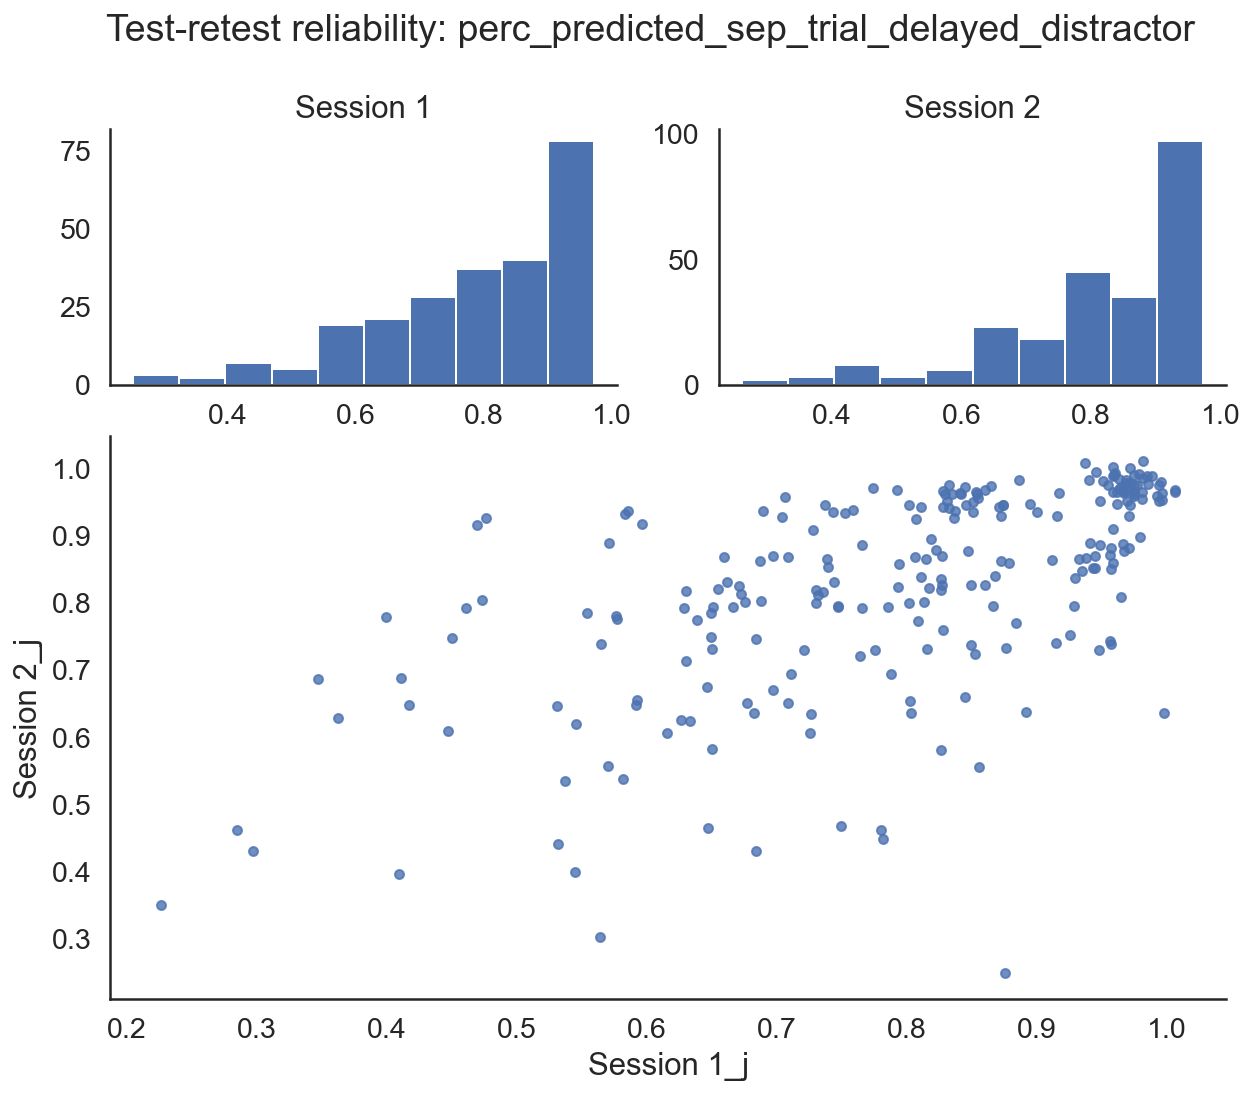

In [ ]:
perc_predicted_sep_trial_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_delayed_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.5957398085465587

### Trial types and sessions modelled jointly

In [ ]:
_df = wm_scoring.get_perc_correct_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
_df['perc_predicted_joint_no_distractor_1'] = _df.perc_predicted_joint_no_distractor_1.astype(float)
_df['perc_predicted_joint_no_distractor_2'] = _df.perc_predicted_joint_no_distractor_2.astype(float)
_df['perc_predicted_joint_encoding_distractor'] = _df.perc_predicted_joint_encoding_distractor.astype(float)
_df['perc_predicted_joint_delayed_distractor'] = _df.perc_predicted_joint_delayed_distractor.astype(float)

R[write to console]: boundary (singular) fit: see ?isSingular



#### No distractor 1

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.583,3.793,239.0,240.0,0.0,0.508,0.649,".58 (.51, .65)"
Single_random_raters,ICC2,0.583,3.800,239.0,239.0,0.0,0.508,0.649,".58 (.51, .65)"
Single_fixed_raters,ICC3,0.583,3.800,239.0,239.0,0.0,0.509,0.649,".58 (.51, .65)"
Average_raters_absolute,ICC1k,0.736,3.793,239.0,240.0,0.0,0.674,0.787,".74 (.67, .79)"
Average_random_raters,ICC2k,0.736,3.800,239.0,239.0,0.0,0.674,0.787,".74 (.67, .79)"
Average_fixed_raters,ICC3k,0.737,3.800,239.0,239.0,0.0,0.674,0.787,".74 (.67, .79)"


,variance,Percent
ID,0.009,0.583
Items,0.000,0.001
Residual,0.007,0.416
Total,0.016,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


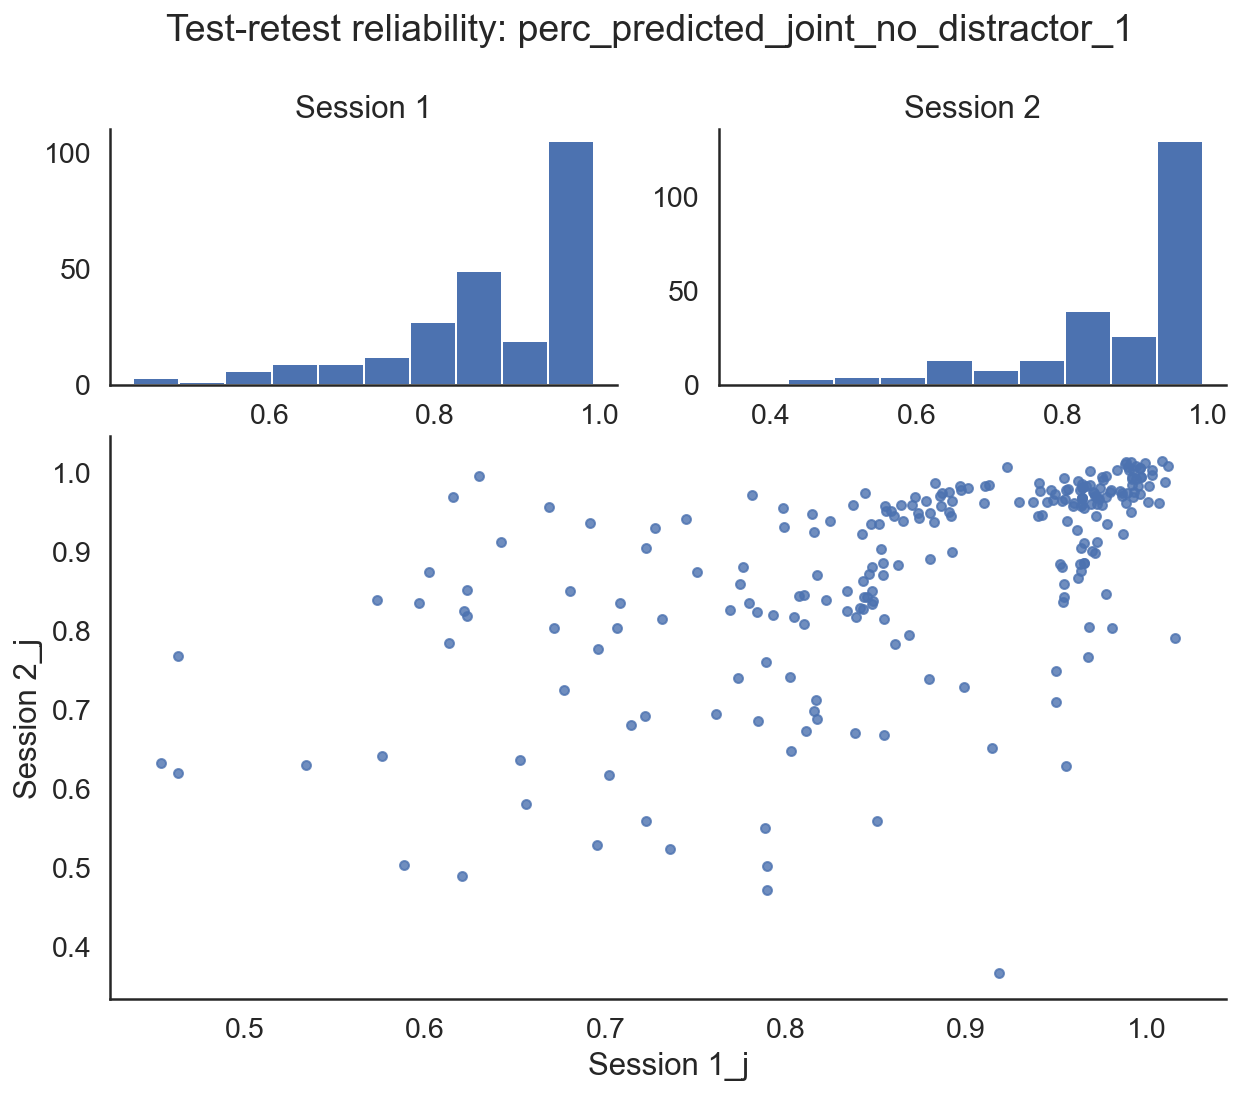

In [ ]:
iccs_perc_predicted_joint_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_joint_no_distractor_1', add_jitter = True)

#### No distractor 2

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.653,4.769,239.0,240.0,0.0,0.588,0.710,".65 (.59, .71)"
Single_random_raters,ICC2,0.653,4.769,239.0,239.0,0.0,0.588,0.710,".65 (.59, .71)"
Single_fixed_raters,ICC3,0.653,4.769,239.0,239.0,0.0,0.588,0.710,".65 (.59, .71)"
Average_raters_absolute,ICC1k,0.790,4.769,239.0,240.0,0.0,0.741,0.831,".79 (.74, .83)"
Average_random_raters,ICC2k,0.790,4.769,239.0,239.0,0.0,0.741,0.831,".79 (.74, .83)"
Average_fixed_raters,ICC3k,0.790,4.769,239.0,239.0,0.0,0.740,0.831,".79 (.74, .83)"


,variance,Percent
ID,0.012,0.653
Items,0.000,0.000
Residual,0.007,0.347
Total,0.019,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


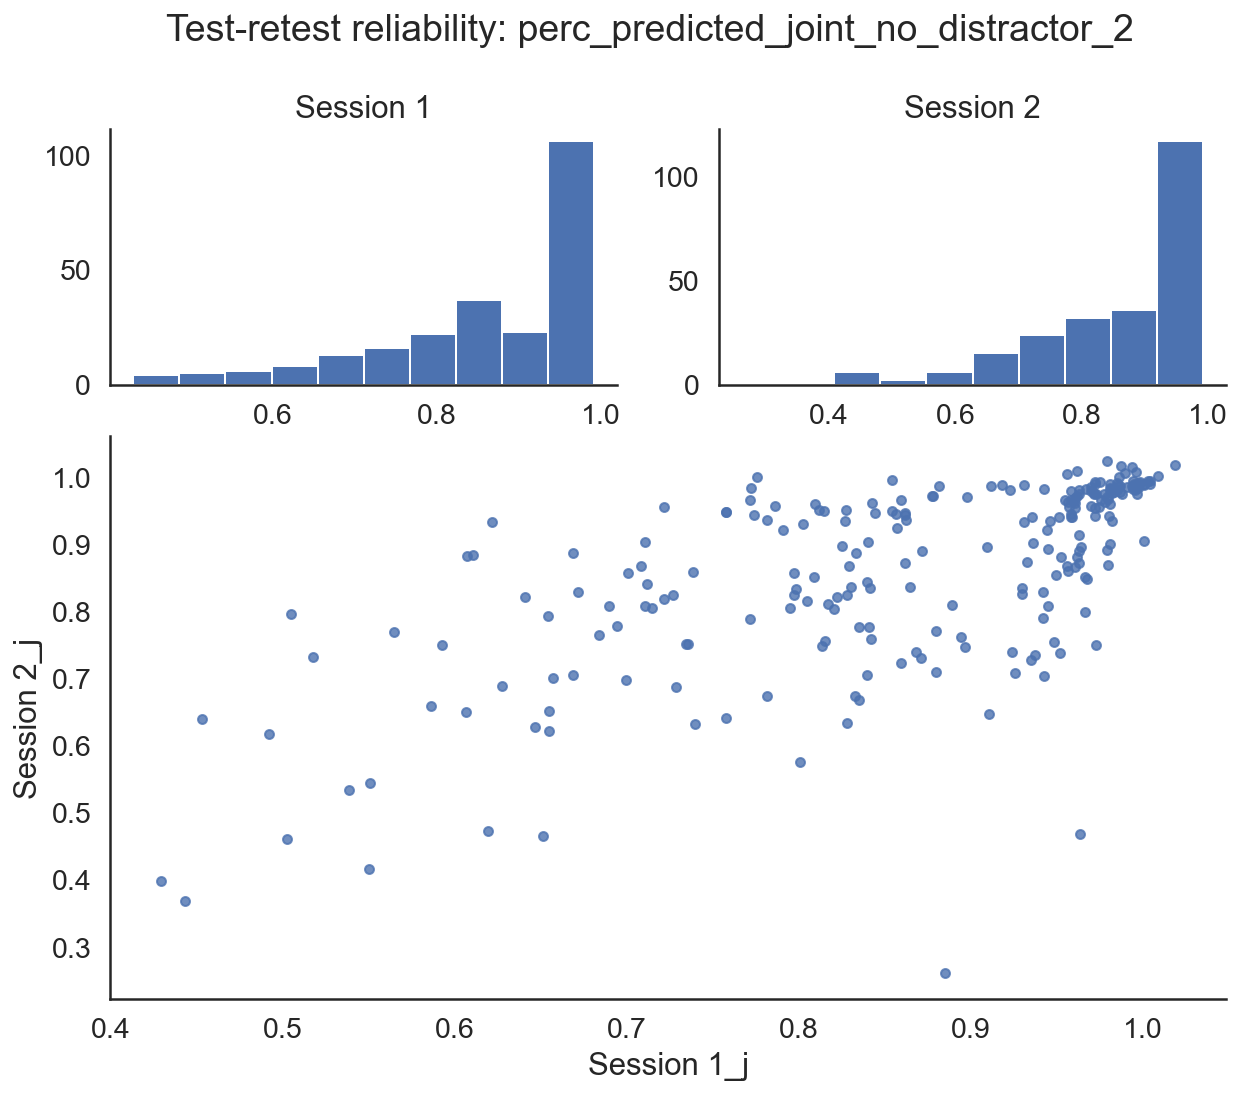

In [ ]:
iccs_perc_predicted_joint_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_joint_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.497,2.974,239.0,240.0,0.0,0.412,0.573,".50 (.41, .57)"
Single_random_raters,ICC2,0.499,3.026,239.0,239.0,0.0,0.415,0.575,".50 (.41, .57)"
Single_fixed_raters,ICC3,0.503,3.026,239.0,239.0,0.0,0.419,0.578,".50 (.42, .58)"
Average_raters_absolute,ICC1k,0.664,2.974,239.0,240.0,0.0,0.584,0.728,".66 (.58, .73)"
Average_random_raters,ICC2k,0.666,3.026,239.0,239.0,0.0,0.586,0.730,".67 (.59, .73)"
Average_fixed_raters,ICC3k,0.669,3.026,239.0,239.0,0.0,0.591,0.733,".67 (.59, .73)"


,variance,Percent
ID,0.010,0.499
Items,0.000,0.009
Residual,0.010,0.493
Total,0.021,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


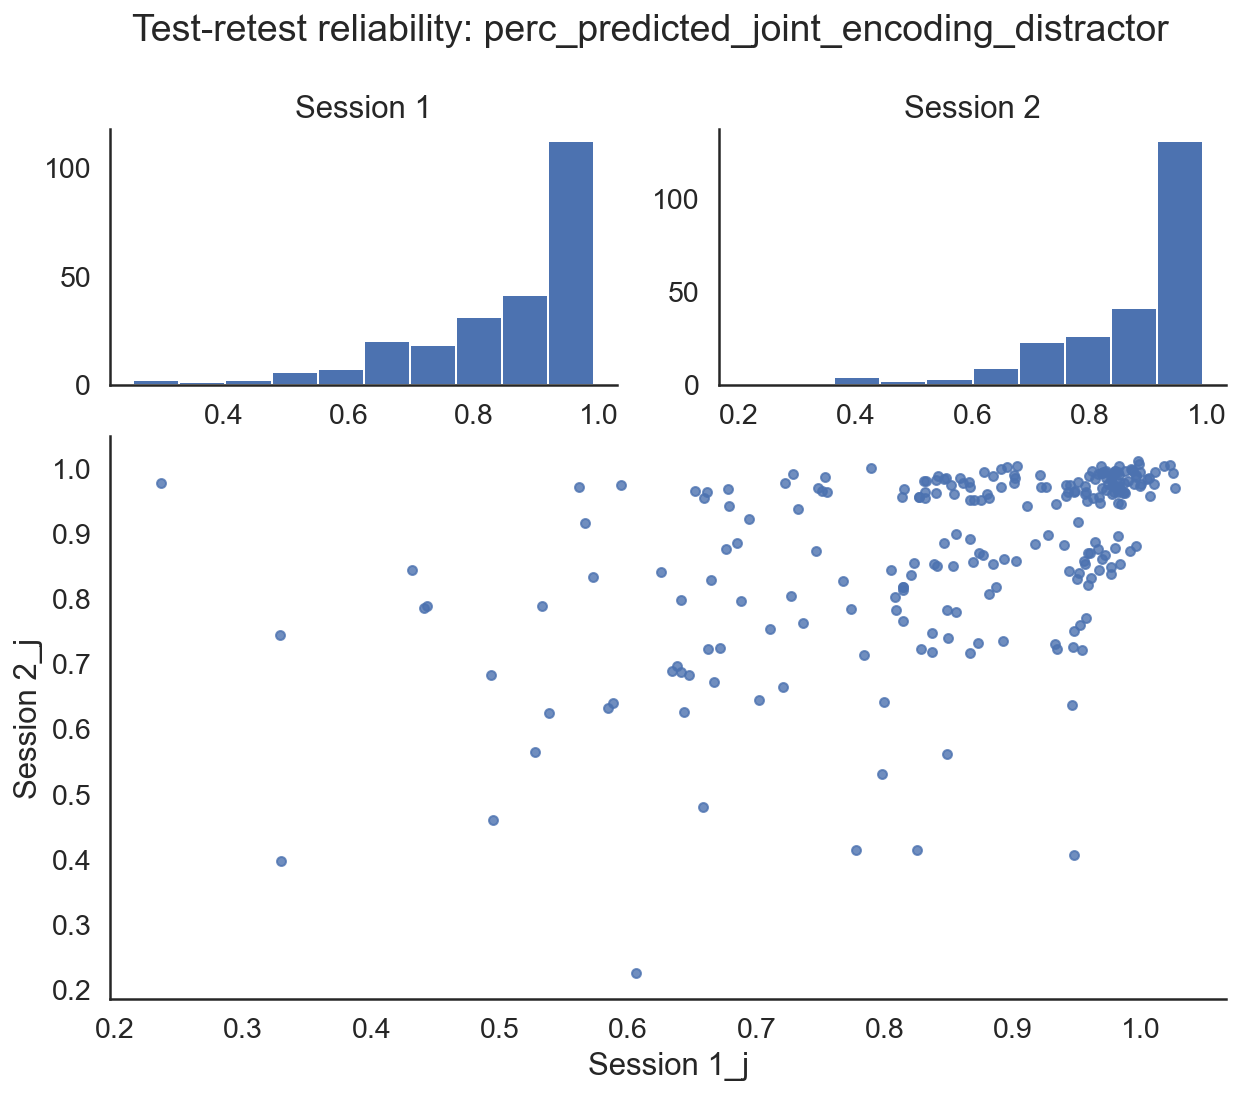

In [ ]:
perc_predicted_joint_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_joint_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.617,4.227,239.0,240.0,0.0,0.547,0.679,".62 (.55, .68)"
Single_random_raters,ICC2,0.620,4.405,239.0,239.0,0.0,0.547,0.684,".62 (.55, .68)"
Single_fixed_raters,ICC3,0.630,4.405,239.0,239.0,0.0,0.561,0.690,".63 (.56, .69)"
Average_raters_absolute,ICC1k,0.763,4.227,239.0,240.0,0.0,0.707,0.809,".76 (.71, .81)"
Average_random_raters,ICC2k,0.766,4.405,239.0,239.0,0.0,0.707,0.812,".77 (.71, .81)"
Average_fixed_raters,ICC3k,0.773,4.405,239.0,239.0,0.0,0.719,0.817,".77 (.72, .82)"


,variance,Percent
ID,0.016,0.620
Items,0.000,0.015
Residual,0.010,0.364
Total,0.026,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


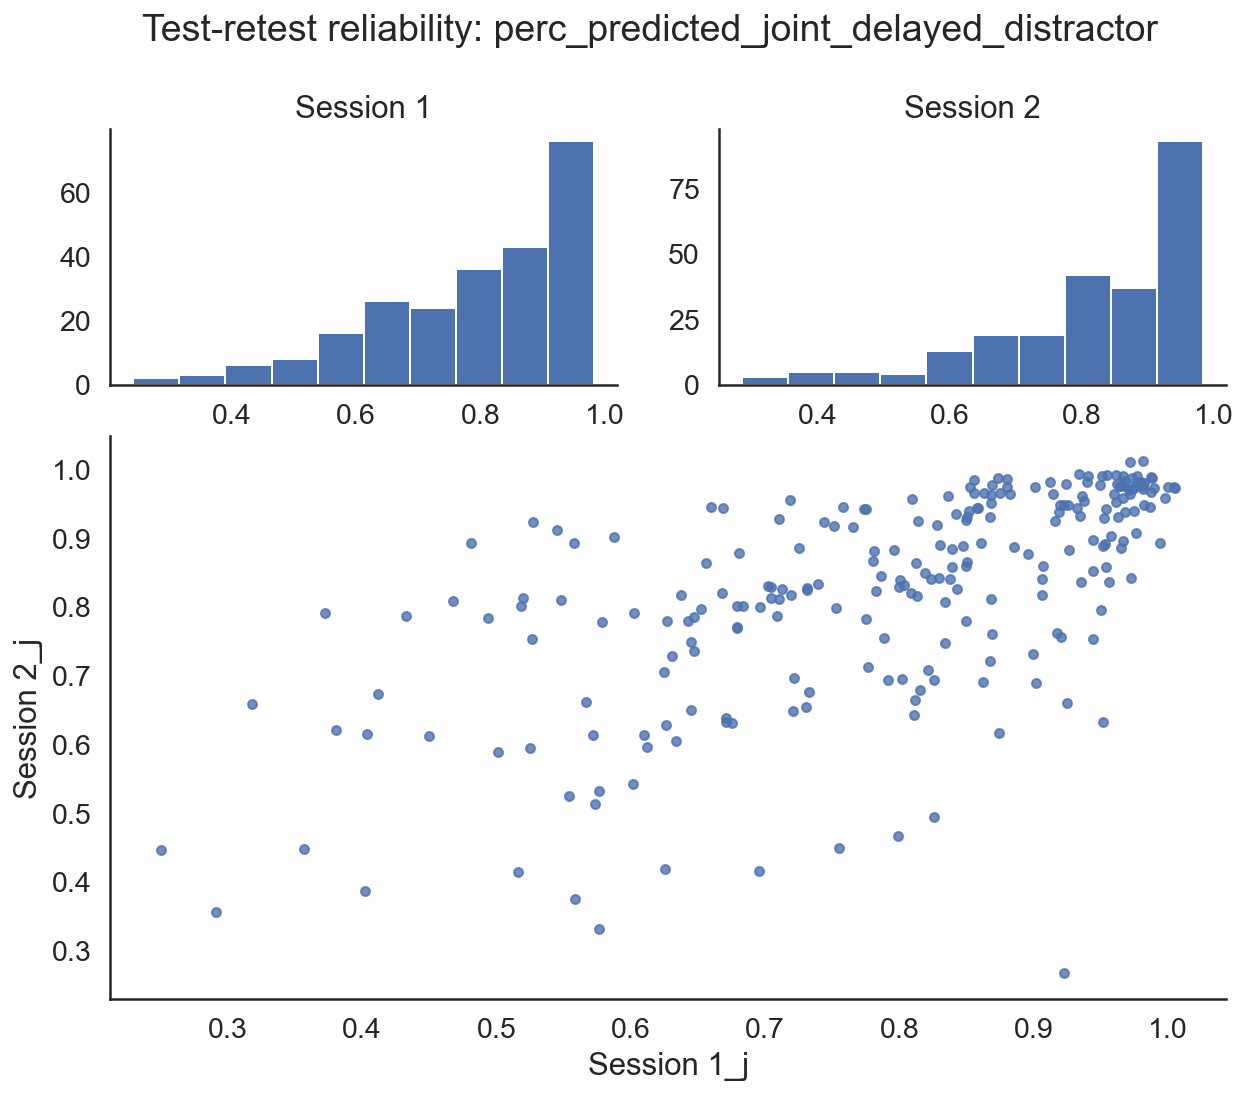

In [ ]:
perc_predicted_joint_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_joint_delayed_distractor', add_jitter = True)

## Comparison of methods

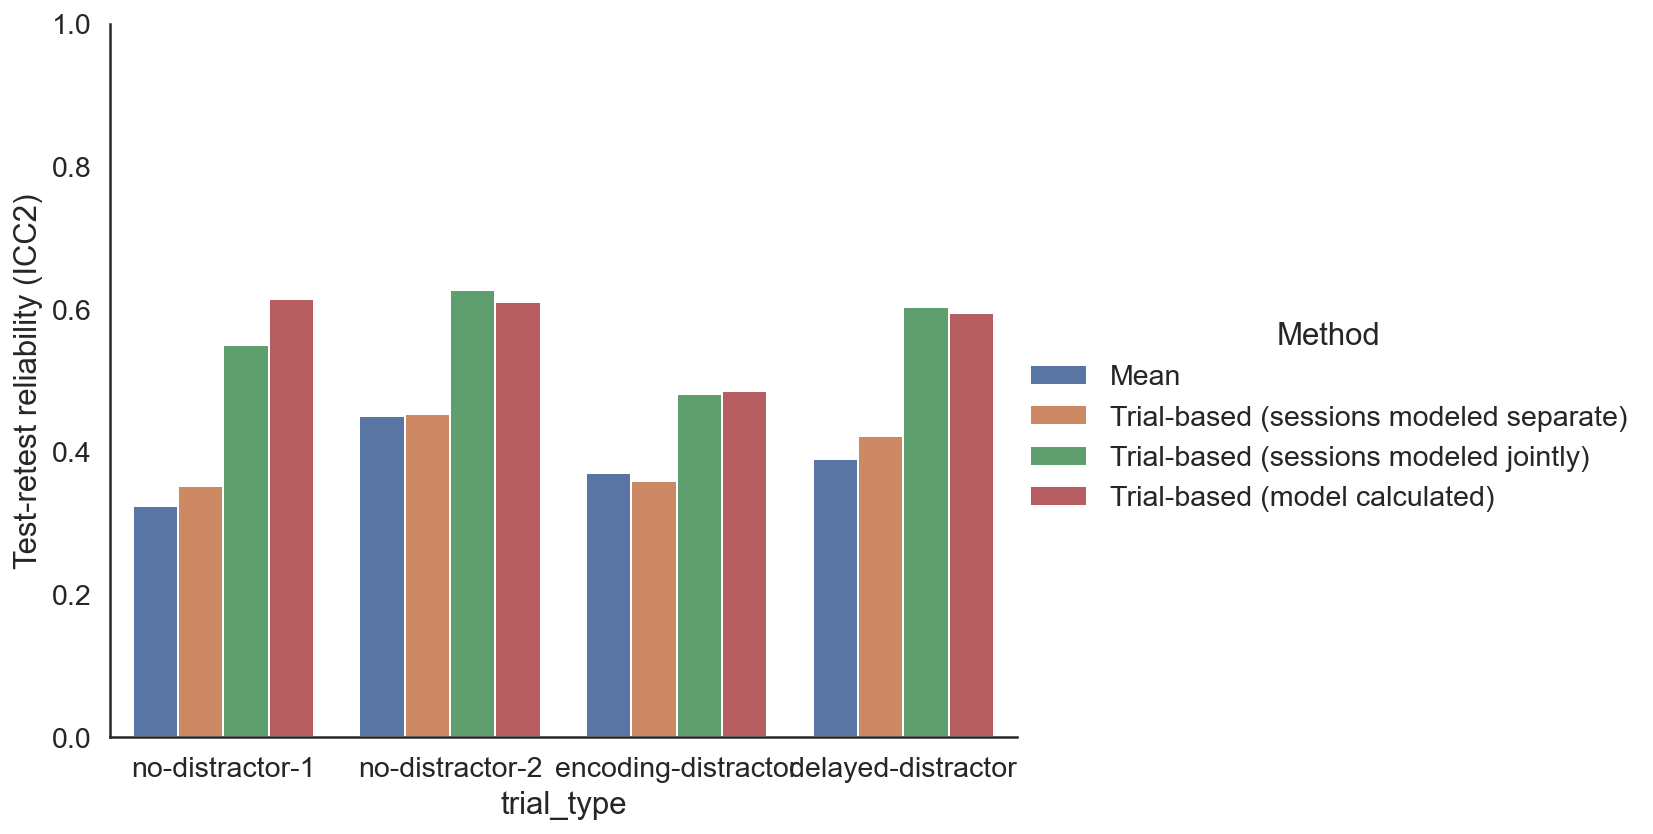

In [ ]:
plot_df = pd.DataFrame({})
icc = "ICC2"#'ICC1k'
plot_df.loc['mean_no-distractor-1','sb'] =               iccs_mean_no_distractor_1['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['mean_no-distractor-2','sb'] =               iccs_mean_no_distractor_2['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['mean_encoding-distractor','sb'] =           iccs_mean_encoding_distractor['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['mean_delayed-distractor','sb'] =            iccs_mean_delayed_distractor['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]

plot_df.loc['trial_sep_no-distractor-1','sb'] =               iccs_perc_predicted_sep_no_distractor_1['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['trial_sep_no-distractor-2','sb'] =               iccs_perc_predicted_sep_no_distractor_2['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['trial_sep_encoding-distractor','sb'] =           perc_predicted_sep_encoding_distractor['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['trial_sep_delayed-distractor','sb'] =            perc_predicted_sep_delayed_distractor['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['trial_joint_no-distractor-1','sb'] =               iccs_perc_predicted_sep_trial_no_distractor_1['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['trial_joint_no-distractor-2','sb'] =               iccs_perc_predicted_sep_trial_no_distractor_2['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['trial_joint_encoding-distractor','sb'] =           perc_predicted_sep_trial_encoding_distractor['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['trial_joint_delayed-distractor','sb'] =            perc_predicted_sep_trial_delayed_distractor['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['model_calc_no-distractor-1','sb'] =   iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']
plot_df.loc['model_calc_no-distractor-2','sb'] =   iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']
plot_df.loc['model_calc_encoding-distractor','sb'] =   iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']
plot_df.loc['model_calc_delayed-distractor','sb'] =   iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']



#plot_df.loc['model_calc_loss','sb'] =  model_calculated_iccs['perc_gamble_trial_joint_loss']['icc']
#plot_df.loc['model_calc_mixed','sb'] = model_calculated_iccs['perc_gamble_trial_joint_mixed']['icc']

plot_df = plot_df.reset_index()
plot_df.rename(columns = {'index':'category','sb':"Test-retest reliability (%s)"%icc}, inplace = True)
plot_df['trial_type'] = plot_df.category.apply(lambda x: x.split('_')[-1])
plot_df['Method'] = plot_df.category.apply(lambda x: '_'.join(x.split('_')[:-1]))
plot_df.Method.replace({'mean':'Mean',
                  'trial_sep':'Trial-based (sessions modeled separate)',
                  'trial_joint':'Trial-based (sessions modeled jointly)',
                  'model_calc':'Trial-based (model calculated)'
                  }, inplace = True)

g = sns.catplot(x = "trial_type",       # x variable name
            y = "Test-retest reliability (%s)"%icc,       # y variable name
            hue = "Method",  # group variable name
            data = plot_df,     # dataframe to plot
            kind = "bar",
           ci = None,
            height=6, aspect=1.3)
g.set(ylim=(0, 1))
ax = g.axes[0][0]
#ax.axhline(.8, color = 'black')

[Text(0, 0, '')]

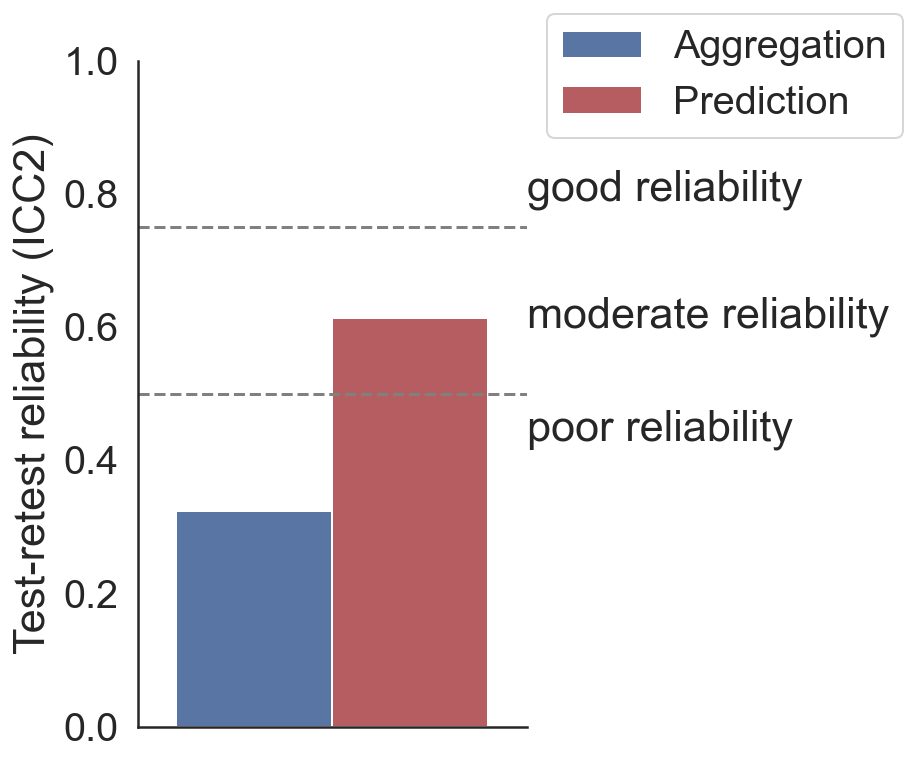

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style="white", font_scale = 1.8, rc=custom_params)
plot_df = pd.DataFrame({})
icc = "ICC2"#'ICC1k'
plot_df.loc['mean_no-distractor-1','sb'] =               iccs_mean_no_distractor_1['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
plot_df.loc['model_calc_no-distractor-1','sb'] =   iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']
plot_df = plot_df.reset_index()
plot_df.rename(columns = {'index':'category','sb':"Test-retest reliability (%s)"%icc}, inplace = True)
plot_df['trial_type'] = plot_df.category.apply(lambda x: x.split('_')[-1])
plot_df['Method'] = plot_df.category.apply(lambda x: '_'.join(x.split('_')[:-1]))
plot_df.Method.replace({'mean':'Aggregation',
                  'trial_sep':'Trial-based (sessions modeled separate)',
                  'trial_joint':'Trial-based (sessions modeled jointly)',
                  'model_calc':'Prediction'
                  }, inplace = True)

g = sns.catplot(x = "trial_type",       # x variable name
            y = "Test-retest reliability (%s)"%icc,       # y variable name
            hue = "Method",  # group variable name
            data = plot_df,     # dataframe to plot
            kind = "bar",
           ci = None,
        legend = False, palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]),
            height=6, aspect=.7)
g.set(ylim=(0, 1))
ax = g.axes[0][0]

plt.legend(loc='upper left', bbox_to_anchor=(1, 1.1))

y_offset = -.07
x_offset = .5
alignment = 'left'
plt.axhline(.5, color = 'grey', linestyle = '--',xmax = 1)
plt.axhline(.75, color = 'grey', linestyle = '--',xmax = 1)
plt.annotate("poor reliability", (0+x_offset,.5+y_offset),horizontalalignment = alignment)
plt.annotate("moderate reliability", (0+ x_offset,.67+y_offset),horizontalalignment = alignment)
plt.annotate("good reliability", (0+x_offset,.86+y_offset),horizontalalignment = alignment)
ax.set_xlabel('')
ax.set_xticklabels([''])
#ax.axhline(.8, color = 'black')

## Variance components

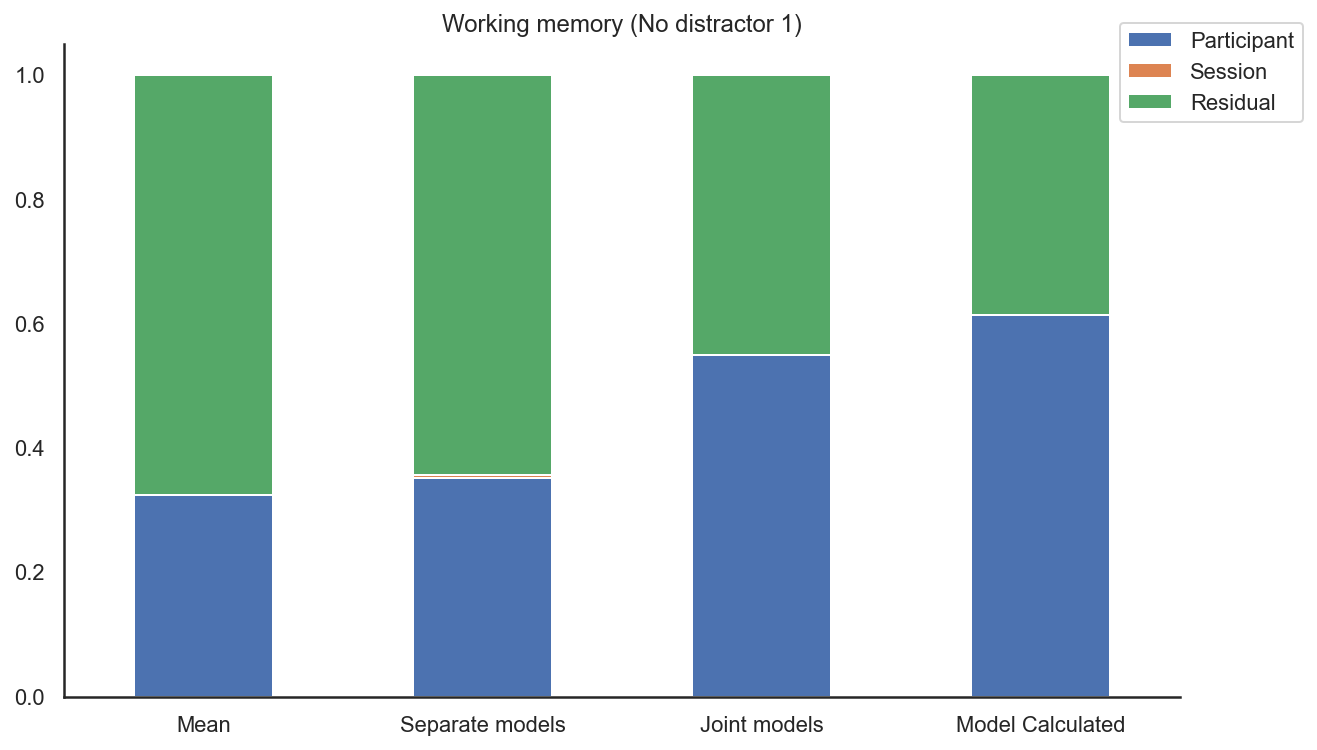

In [ ]:
sns.set_theme(style="white", font_scale = 1, rc=custom_params)

def var_comp_plot(title, results):
    perc_variance = []
    for r in results.items():
        variances = r[1]['iccs'][1]
        if "type" in variances.columns:
            variances = variances.set_index('type')
        variances = variances.T.rename(columns = {"ID":"Participant","Items":"Session"})
        perc_variance.append(variances[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    ax = df.plot(kind = 'bar', stacked = True, figsize = (10,6))
    ax.grid(False)
    sns.despine()
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)

var_comp_plot("Working memory (No distractor 1)",{'Mean':iccs_mean_no_distractor_1,'Separate models':iccs_perc_predicted_sep_no_distractor_1,'Joint models':iccs_perc_predicted_sep_trial_no_distractor_1,'Model Calculated':iccs_perc_predicted_sep_trial_mod_no_distractor_1['variances']})

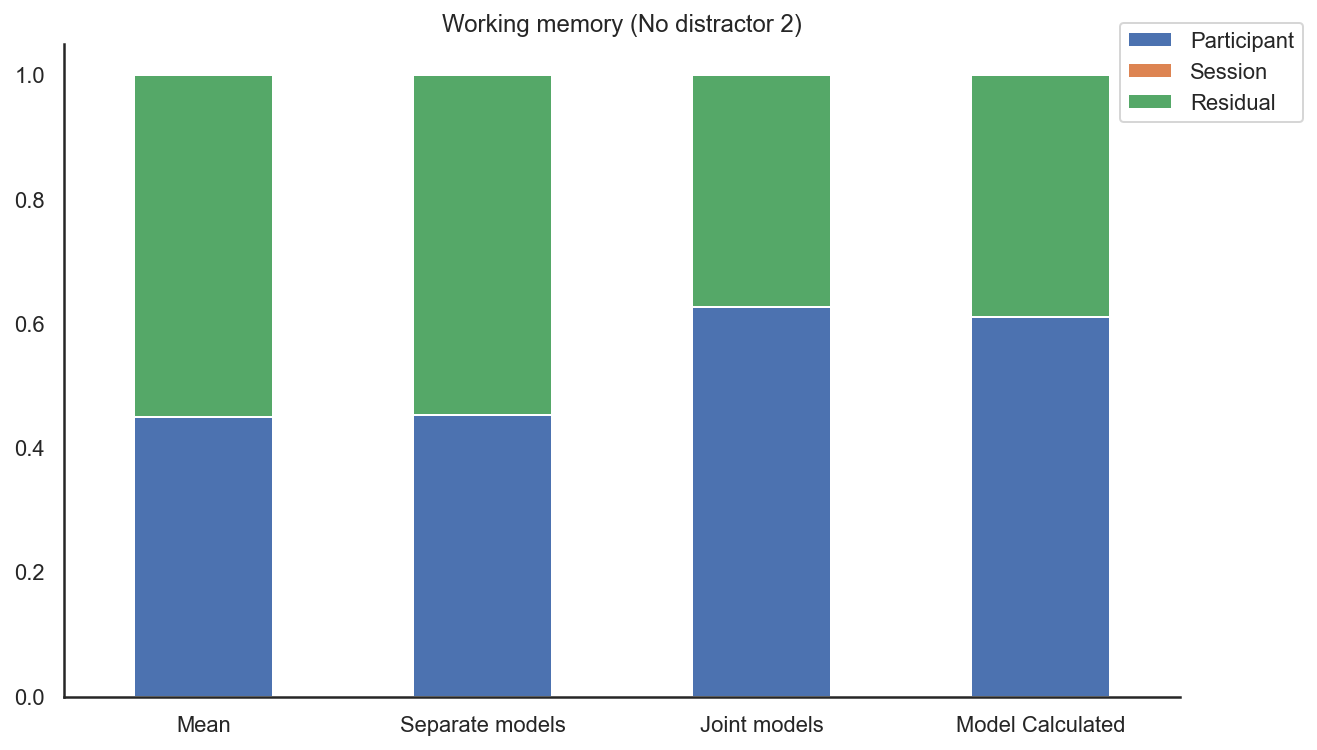

In [ ]:
var_comp_plot("Working memory (No distractor 2)",{'Mean':iccs_mean_no_distractor_2,'Separate models':iccs_perc_predicted_sep_no_distractor_2,'Joint models':iccs_perc_predicted_sep_trial_no_distractor_2,'Model Calculated':iccs_perc_predicted_sep_trial_mod_no_distractor_2['variances']})

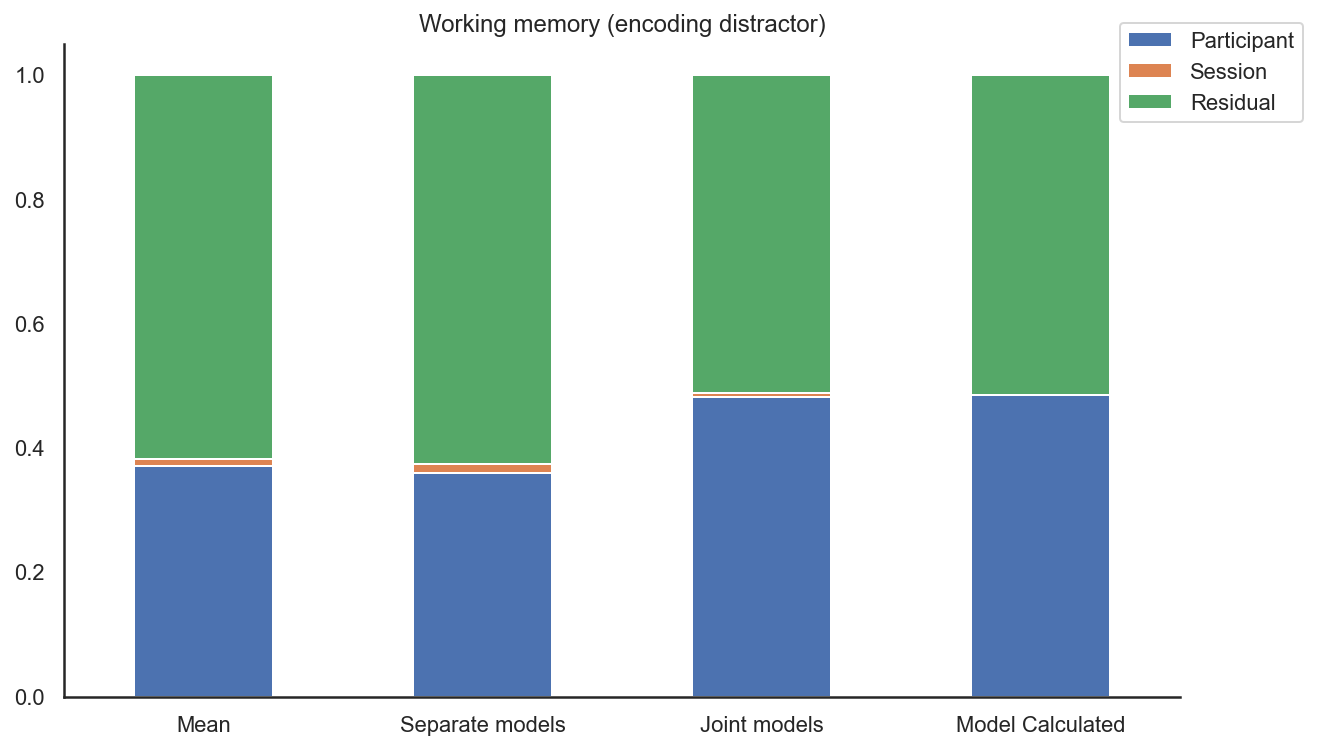

In [ ]:
var_comp_plot("Working memory (encoding distractor)",{'Mean':iccs_mean_encoding_distractor,'Separate models':perc_predicted_sep_encoding_distractor,'Joint models':perc_predicted_sep_trial_encoding_distractor,'Model Calculated':iccs_perc_predicted_sep_trial_mod_encoding_distractor['variances']})

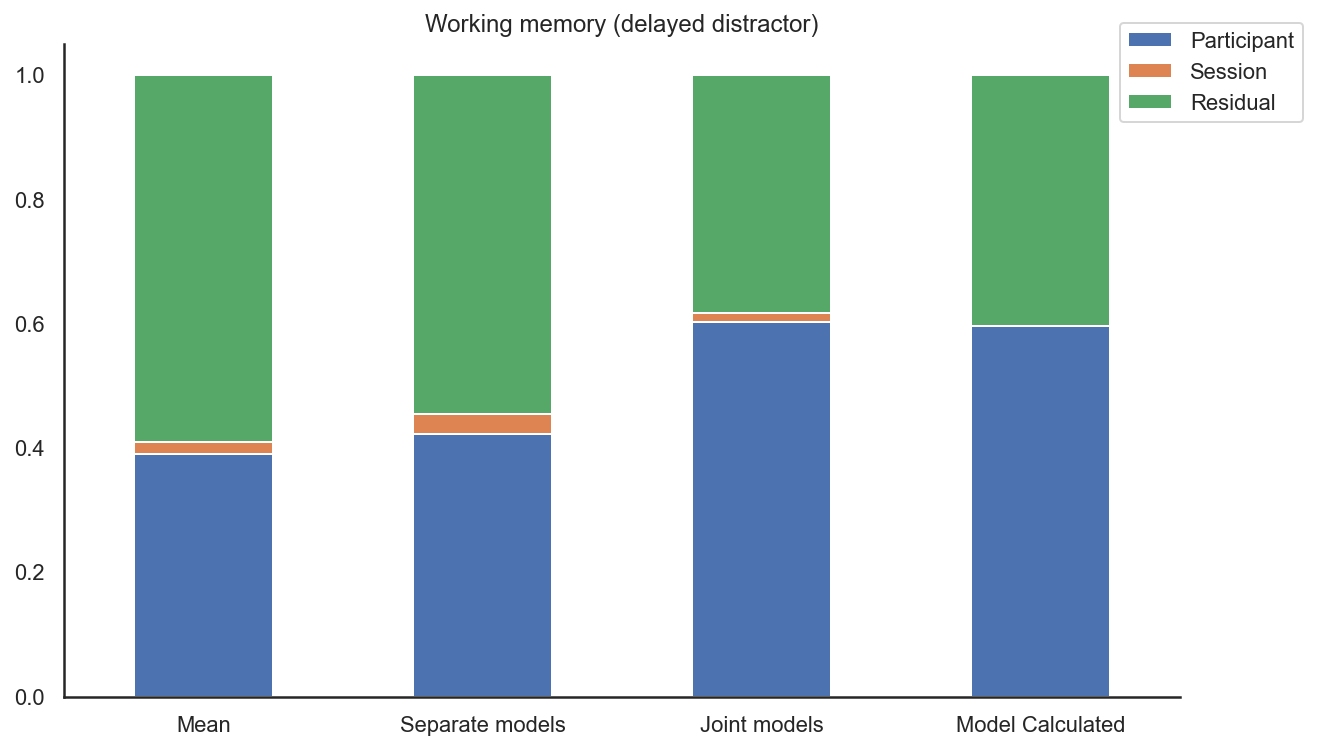

In [ ]:
var_comp_plot("Working memory (delayed distractor)",{'Mean':iccs_mean_delayed_distractor,'Separate models':perc_predicted_sep_delayed_distractor,'Joint models':perc_predicted_sep_trial_delayed_distractor,'Model Calculated':iccs_perc_predicted_sep_trial_mod_delayed_distractor['variances']})

## Effect of time

In [ ]:
def var_comp_plot(title, results):
    perc_variance = []
    for r in results.items():
        variances = r[1]['iccs'][1].T
        variances.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(variances[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    ax = df.plot(kind = 'bar', stacked = True)
    ax.grid(False)
    sns.despine()
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)

def test_effect_of_time(dp, score_function, variables, session_filter, other_filters = []):
    _df = dp.get_wm_data()
    # Adding data from redcap
    _df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline','time_since_last_gbe']), left_on = 'gbe_index', right_index = True, how = 'left')
    _df = _df.query("is_initial")
# Getting first and third session (if within 14 to 45 days after first session).
    _df = _df.query(session_filter)
    for filt in other_filters:
        _df = filt(_df)
    _df, _ms = score_function(_df)
    _df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
    iccs = {}
    for var in variables:
        iccs[var] = stats.analyze_reliability(_df, dependent = var, silent = True)
    return iccs

In [ ]:
def time_analysis(title, session_filter):
    types = ['perc_predicted_sep_trial_no_distractor_1',
                           'perc_predicted_sep_trial_no_distractor_2',
                           'perc_predicted_sep_trial_encoding_distractor',
                           'perc_predicted_sep_trial_delayed_distractor']
    iccs = test_effect_of_time(dp,
                           wm_scoring.get_perc_correct_predicted_sep_trial,
                           types,
                           session_filter,
                           other_filters = [dp.filter_old_app_sessions, dp.filter_level_two_failures])

    var_comp_plot(title,{"No 1":iccs['perc_predicted_sep_trial_no_distractor_1'],
                       "No 2":iccs['perc_predicted_sep_trial_no_distractor_2'],
                       "Encoding":iccs['perc_predicted_sep_trial_encoding_distractor'],
                       "Delayed distract":iccs['perc_predicted_sep_trial_delayed_distractor']})
    print("ICC_2s:")
    for outcome in iccs.keys():
        print("%s: %.2f"%('_'.join(outcome.split('_')[4:]), iccs[outcome]['iccs'][0].loc['Single_random_raters'].ICC))


9 participants used an old version of the task in some of their sessions.  18 sessions (3.07%) were removed from the dataset.
7 sessions (1.23%) were removed because participants failed a level two trial.


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



ICC_2s:
no_distractor_1: 0.58
no_distractor_2: 0.65
encoding_distractor: 0.51
delayed_distractor: 0.63


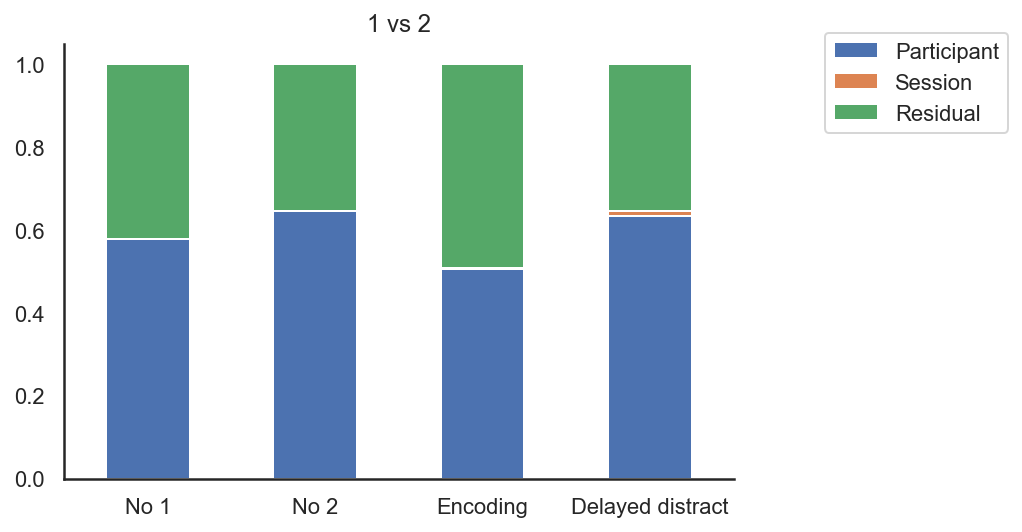

In [ ]:
iccs = time_analysis("1 vs 2", "(session_number == 1) or (session_number == 2)")

9 participants used an old version of the task in some of their sessions.  9 sessions (1.85%) were removed from the dataset.
4 sessions (0.84%) were removed because participants failed a level two trial.


R[write to console]: boundary (singular) fit: see ?isSingular



ICC_2s:
no_distractor_1: 0.54
no_distractor_2: 0.58
encoding_distractor: 0.46
delayed_distractor: 0.74


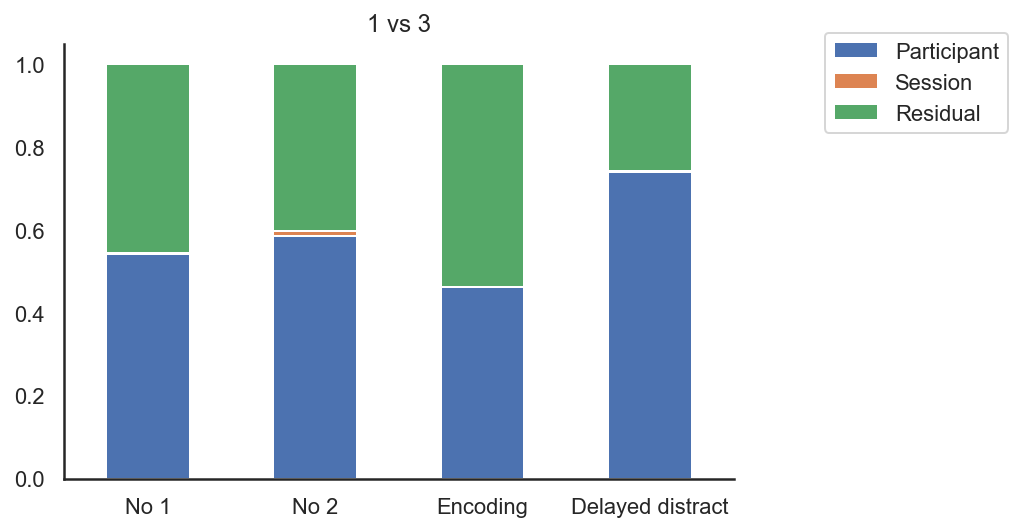

In [ ]:
iccs = time_analysis("1 vs 3", "(session_number == 1) or ((session_number == 3) and (time_since_last_gbe > 14) and (time_since_last_gbe < 45))")

9 participants used an old version of the task in some of their sessions.  12 sessions (2.63%) were removed from the dataset.
2 sessions (0.45%) were removed because participants failed a level two trial.


R[write to console]: boundary (singular) fit: see ?isSingular



ICC_2s:
no_distractor_1: 0.69
no_distractor_2: 0.64
encoding_distractor: 0.52
delayed_distractor: 0.67


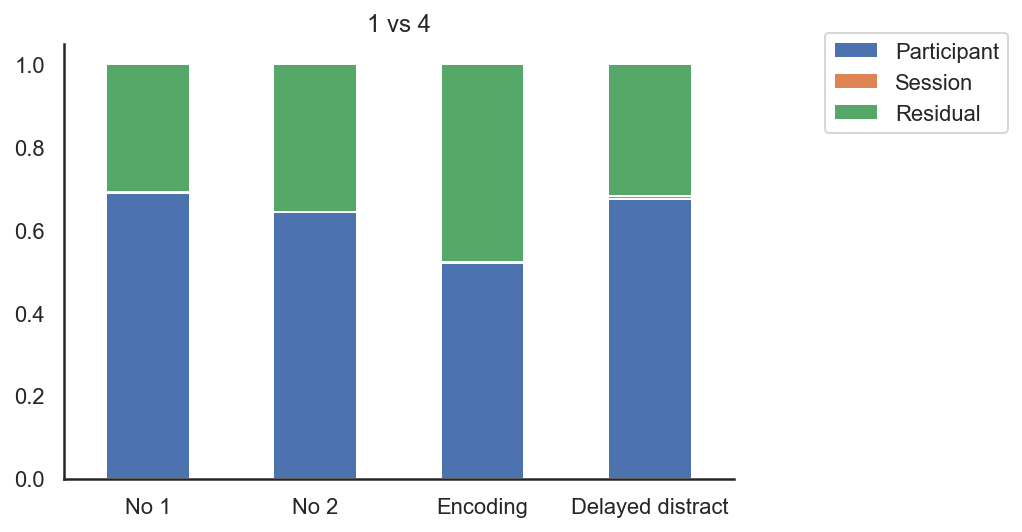

In [ ]:
iccs = time_analysis("1 vs 4", "(session_number == 1) or ((session_number == 4) and (time_since_last_gbe > 14) and (time_since_last_gbe < 45))")

9 participants used an old version of the task in some of their sessions.  9 sessions (2.12%) were removed from the dataset.
2 sessions (0.48%) were removed because participants failed a level two trial.


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



ICC_2s:
no_distractor_1: 0.68
no_distractor_2: 0.69
encoding_distractor: 0.55
delayed_distractor: 0.65


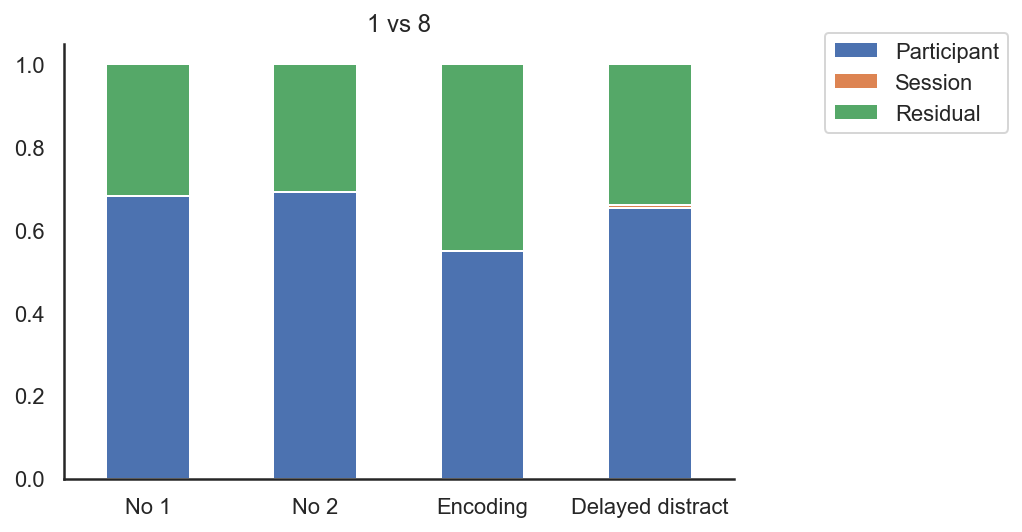

In [ ]:
iccs = time_analysis("1 vs 8", "(session_number == 1) or ((session_number == 8) and (time_since_last_gbe > 14) and (time_since_last_gbe < 45))")